<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/E2E_ClusteringApproach_Hep_fold1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inputs

In [ ]:
#getting complete data
import pandas as pd
import numpy as np


"""in_file = pd.read_csv("/content/drive/MyDrive/Hep_DataSet/k-fold/hep_data_complete.txt", header=None)

in_file.head(2)

#in_file = "/content/drive/MyDrive/BreastCancer_Dataset1202/K-fold/Breast_cancer_complete.txt""""

SyntaxError: ignored

In [ ]:
# for generating rules 
minsup, minconf, itemset_max_size = .01,.8,-1

In [ ]:
#paramters for DBSCAN
my_minpts,my_eps = 10, 2.0
delta1, delta2, substantial_threshold = 0.0,-0.9, 0.0

In [ ]:
#for Optics
my_minpoints, xi = 10, .055

In [ ]:
"""#getting 3 folds since data set is small

from sklearn.model_selection import KFold

#df = in_file.values
kf = KFold(n_splits=3, shuffle=True, random_state=1 )

for i, (train, test) in enumerate(kf.split(in_file)):

  train_d = in_file.iloc[train]
  test_d =  in_file.iloc[test]
  train_d.to_csv('/content/drive/MyDrive/Hep_DataSet/k-fold/train'+str(i)+'.csv', header=None, index=False)
  test_d.to_csv('/content/drive/MyDrive/Hep_DataSet/k-fold/test'+str(i)+'.csv', header=None, index=False)"""
  

"#getting 3 folds since data set is small\n\nfrom sklearn.model_selection import KFold\n\n#df = in_file.values\nkf = KFold(n_splits=3, shuffle=True, random_state=1 )\n\nfor i, (train, test) in enumerate(kf.split(in_file)):\n\n  train_d = in_file.iloc[train]\n  test_d =  in_file.iloc[test]\n  train_d.to_csv('/content/drive/MyDrive/Hep_DataSet/k-fold/train'+str(i)+'.csv', header=None, index=False)\n  test_d.to_csv('/content/drive/MyDrive/Hep_DataSet/k-fold/test'+str(i)+'.csv', header=None, index=False)"

In [ ]:
Filepath = "/content/drive/MyDrive/Hep_DataSet/k-fold/"
inputfilepath = "/content/drive/MyDrive/Hep_DataSet/k-fold/train0.csv"
inputTestfilepath = "/content/drive/MyDrive/Hep_DataSet/k-fold/test0.csv"

Generating Rules

In [ ]:
class RuleMiner(object):    
    '''
    This class is used to generate_itemsets_and_rules and store a Naive Belief System 
    by using the most confident association rules
    '''

    def __init__(self, filter_name, train_data_set):
        
        self.nthreads = 4
        self.files_info = ARMFiles(Filepath)
        
        self.filter_name = filter_name
        self.data_set = train_data_set #taking input the dataset


    '''
    Generate association rules and select K patterns with highest confidence.
    '''    
    def generate_itemsets_and_rules(self, arm_params):
        self.generate_frequent_itemsets(arm_params)
        self.generate_association_rules(arm_params)
        #self.extract_features_4_all_rules()

    '''
    Generate frequent itemsets from data-set
    '''
    def generate_frequent_itemsets(self, arm_params):
        
        print ('generating frequent item-sets...')
        apriori = Apriori(self.data_set)
        apriori.generate_frequent_itemsets_vw(arm_params.min_sup * self.data_set.size(), 
                                              self.nthreads, 
                                              arm_params.itemset_max_size, 
                                              self.files_info.itemset_tmp_file)
        
    '''
    Generate association rules from data-set. 
    This method must be called after generate_frequent_itemsets(...) is called
    '''
    def generate_association_rules(self, arm_params):
        freq_itemsets_dict = self.load_frequent_itemsets_as_dict()
        
        print ('generating rules ....')
        itemset_formatter = getattr(ItemsetFormatter, self.filter_name)
        rule_formatter = getattr(RuleFormatter, self.filter_name)
        rule_generator = Generator(freq_itemsets_dict, 
                                   arm_params.min_conf, 
                                   itemset_formatter, 
                                   rule_formatter, 
                                   self.nthreads)
        rule_generator.execute(self.files_info.rules_tmp_file)


    '''
    Load generated frequent itemsets from file. 
    This method must be called after generate_frequent_itemsets is called
    '''
    def load_frequent_itemsets_as_dict(self):
        freq_itemset_dict = ItemsetDictionary(0)
        freq_itemset_dict.load_from_file(self.files_info.itemset_tmp_file)
        return freq_itemset_dict

In [ ]:
class RuleMiner(object):    
    '''
    This class is used to generate_itemsets_and_rules and store a Naive Belief System 
    by using the most confident association rules
    '''

    def __init__(self, filter_name, train_data_set):
        
        self.nthreads = 4
        self.files_info = ARMFiles(Filepath)
        
        self.filter_name = filter_name
        self.data_set = train_data_set #taking input the dataset


    '''
    Generate association rules and select K patterns with highest confidence.
    '''    
    def generate_itemsets_and_rules(self, arm_params):
        self.generate_frequent_itemsets(arm_params)
        self.generate_association_rules(arm_params)
        #self.extract_features_4_all_rules()

    '''
    Generate frequent itemsets from data-set
    '''
    def generate_frequent_itemsets(self, arm_params):
        
        print ('generating frequent item-sets...')
        apriori = Apriori(self.data_set)
        apriori.generate_frequent_itemsets_vw(arm_params.min_sup * self.data_set.size(), 
                                              self.nthreads, 
                                              arm_params.itemset_max_size, 
                                              self.files_info.itemset_tmp_file)
        
    '''
    Generate association rules from data-set. 
    This method must be called after generate_frequent_itemsets(...) is called
    '''
    def generate_association_rules(self, arm_params):
        freq_itemsets_dict = self.load_frequent_itemsets_as_dict()
        
        print ('generating rules ....')
        itemset_formatter = getattr(ItemsetFormatter, self.filter_name)
        rule_formatter = getattr(RuleFormatter, self.filter_name)
        rule_generator = Generator(freq_itemsets_dict, 
                                   arm_params.min_conf, 
                                   itemset_formatter, 
                                   rule_formatter, 
                                   self.nthreads)
        rule_generator.execute(self.files_info.rules_tmp_file)


    '''
    Load generated frequent itemsets from file. 
    This method must be called after generate_frequent_itemsets is called
    '''
    def load_frequent_itemsets_as_dict(self):
        freq_itemset_dict = ItemsetDictionary(0)
        freq_itemset_dict.load_from_file(self.files_info.itemset_tmp_file)
        return freq_itemset_dict

Helper classes

In [ ]:

def string_2_itemset(key):
    if key == '':
        return []
    else: 
        return key.split(',')

def itemset_2_string(itemset):
    return ",".join(itemset)

def merge_itemsets(itemset_1, itemset_2):
    merged_items = []
    merged_items.extend(itemset_1)
    merged_items.extend(itemset_2)
    merged_items = list(set(merged_items))
    merged_items = sorted(merged_items)
    
    return merged_items

def get_full_path(prefix, file_name):
    if prefix == '': return file_name
    return prefix + '//' + file_name


In [ ]:
import json

class HashItem:
    
    def __init__(self, item):
        self.last_item = item 
        self.tids = []
    
    def add_tid(self, tid):
        self.tids.append(tid)
        
    def add_tids(self, tids):
        self.tids.extend(tids)
    
    def size(self):
        return len(self.tids)
    
    def serialize(self):
        return json.dumps((self.last_item, self.tids))
    
    def deserialize(self, json_string):
        result = json.loads(json_string)
        self.last_item = result[0]
        self.tids = result[1]
        

In [ ]:
class HashItemCollection:
    def __init__(self):
        self.train_data = []
    
    def __iter__(self):
        return iter(self.train_data)
    
    def get_item(self, index):
        return self.train_data[index]
    
    def get_items_from(self, index):
        return self.train_data[index : ]
    
    def size(self):
        return len(self.train_data)
    
    def is_contain(self, item):
        for current_item in self.train_data:
            if current_item.last_item == item : 
                return True
        return False
        
    def sort(self):
        self.train_data.sort(key=lambda x: x.last_item, reverse=False)
    
    def add_item(self, hash_item):
        self.train_data.append(hash_item)
        
    def find_item(self, item):
        left = 0
        right = len(self.train_data) - 1
        while (left <= right):
            pivot = int((left + right)/2)
            if self.train_data[pivot].last_item == item: 
                return pivot
            if self.train_data[pivot].last_item < item:
                left = pivot + 1
            else:
                right = pivot - 1 
        return -1
        
    def add_tid(self, item, tid):
        index = self.find_item(item)
        if index == -1:
            hash_item = HashItem(item)
            hash_item.add_tid(tid)
            
            index = len(self.train_data) - 1
            self.train_data.append(hash_item)
            
            while index >= 0:
                if self.train_data[index].last_item > item:
                    self.train_data[index + 1] = self.train_data[index]
                    index -= 1
                else:
                    break
            self.train_data[index + 1] = hash_item        
        else:
            self.train_data[index].add_tid(tid)
    
    def serialize(self):
        temp = []
        for item in self.train_data:
            temp.append(item.serialize())
        return json.dumps(temp)

    def deserialize(self, json_string):
        self.train_data = []
        
        temp = json.loads(json_string)
        for item_string in temp:
            item = HashItem(None)
            item.deserialize(item_string)
            self.train_data.append(item)
        

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

class ItemsetDictionary(object):
    

    def __init__(self, ntransactions = 0):
        self.itemsets = {}
        self.ntransactions = ntransactions
            
    def size(self):
        return len(self.itemsets)
    
    def exists(self, itemset_key):
        return itemset_key in self.itemsets
    
    def add_itemset(self, itemset_key, amount):
        self.itemsets[itemset_key] = amount
        
    def clear(self):
        self.itemsets.clear()
    
    def convert_2_indexes(self):
        k = 0
        dict_items_indexes = {}
        for item_name, _ in self.itemsets.items():
            dict_items_indexes[item_name] = k
            k += 1
        return dict_items_indexes
            
    def get_names(self):
        return self.itemsets.keys()
        
    def get_frequency(self, itemset_key):
        if self.exists(itemset_key):
            return self.itemsets[itemset_key]
        return 0
        
    def getConfidence(self, rule):
        left = self.get_frequency(rule.lhs_string())
        both = self.get_frequency(rule.rule_itemset_2_string())
        if left == 0: return 0
        return both/left
    
    def get_frequency_combo(self, rule):
        left = self.get_frequency(rule.lhs_string())
        right =self.get_frequency(rule.rhs_string())
        both = self.get_frequency(rule.rule_itemset_2_string())
        
        return left, right, both
    
    def get_support(self, itemset_key):     
        return self.get_frequency(itemset_key)/self.ntransactions
       
    def split(self, nchunks):
        itemsets_names = self.itemsets.keys()
        nitemsets = len(itemsets_names)
        
        print ('Number of frequent item-sets: ' + str(nitemsets))
        itemset_chunks = [[] for _ in range(nchunks)]
        size_of_chunk = (int)(nitemsets/nchunks) + 1
                    
        index = 0
        counter = 0
        
        for itemset_key in itemsets_names:
            if counter < size_of_chunk:
                itemset_chunks[index].append(string_2_itemset(itemset_key))
                counter += 1
            elif counter == size_of_chunk:
                index += 1
                itemset_chunks[index].append(string_2_itemset(itemset_key))
                counter = 1  
                  
        return itemset_chunks
    
    def save_2_file(self, file_name, write_mode = 'a', write_support = False):
        with open(file_name, write_mode) as text_file:
            for key, value in self.itemsets.items():
                t = value
                if write_support == True:
                    t = value/self.ntransactions
                text_file.write(key + ':' + str(t))
                text_file.write('\n')
            
    def load_from_file(self,file_name):
        self.itemsets.clear()
        
        with open(file_name, "r") as text_file:
            self.ntransactions = int(text_file.readline())
            for line in text_file:
                #print (line)
                subStrings = line.split(':')
                itemset_key = subStrings[0].strip()
                frequency = int(subStrings[1].strip())
                
                self.itemsets[itemset_key] = frequency
                
    def _complement_condition(self, r1, r2):
        merged_itemset = merge_itemsets(r1.left_items, 
                                        r2.left_items)
        
        s = self.get_frequency(itemset_2_string(merged_itemset))
        sl = self.get_frequency(r1.lhs_string())
        sr = self.get_frequency(r2.lhs_string())
    
        #if s > 0: return True
        return max(s/sl, s/sr)
     
        
    '''
    Check if two rules are contrary each other based on the matching function
    r1, r2: dictionaries includes {'r': rule, 'f': feature vector}
    contrast_params: contains thresholds, and size of LHS, RHS features 
    '''
    def is_contrast(self, r1, r2, contrast_params):
        
        n = contrast_params.n_lhs_features
        a = cosine_similarity(np.reshape(r1['f'][n:], (1, -1)),
                              np.reshape(r2['f'][n:], (1, -1)))[0,0]
        if a > contrast_params.delta2: return (False, 0, 0)
        
        b = cosine_similarity(np.reshape(r1['f'][:n], (1, -1)), 
                              np.reshape(r2['f'][:n], (1, -1)))[0,0]
        if b <= contrast_params.delta1: return (False, 0, 0)
        
        t = self._complement_condition(r1['r'], r2['r'])
        if t > contrast_params.share_threshold:
            return (True, b, t)
        return (False, 0, 0)
    
    
    def is_inner_contrast(self, group, contrast_params):
        #print('check inner')
        both_condition = self.find_pottential_contrast_locs(group, group, contrast_params)
        if both_condition is None: return False 
        
        for i in range(len(both_condition[0])):
            x = both_condition[0][i]
            y = both_condition[1][i]
            if x >= y: continue
            t = self._complement_condition(group['r'][x], group['r'][y])
            if t > contrast_params.share_threshold: return True 
            
        return False

        
        
    def find_pottential_contrast_locs(self, group1, group2, contrast_params):
        rhs_sim = cosine_similarity(group1['rhs'], group2['rhs']) 
        rhs_condition = (rhs_sim > contrast_params.delta2).astype(int) 
        if np.all(rhs_condition > 0) == True: return None 
    
        
        lhs_sim = cosine_similarity(group1['lhs'], group2['lhs'])
        lhs_condition = (lhs_sim <= contrast_params.delta1).astype(int)
        if np.all(lhs_condition > 0) == True: return None 
        
        locs = np.where(lhs_condition + rhs_condition <= 0)
        return locs 
        
    def is_outer_contrast(self, group1, group2, contrast_params):
        #print('check outer')
        both_condition = self.find_pottential_contrast_locs(group1, group2, contrast_params)
        if both_condition is None: return False 
        
        for i in range(len(both_condition[0])):
            x = both_condition[0][i]
            y = both_condition[1][i]
            t = self._complement_condition(group1['r'][x], group2['r'][y])
            if t > contrast_params.share_threshold: return True 
            
        return False
    

In [ ]:
class HashTable:
    def __init__(self):
        self.table = {}
        
    def size(self):
        return len(self.table)
    
    def is_empty(self):
        return len(self.table) == 0;
    
    def is_contain(self, key, last_item):
        return (key in self.table) and (self.table[key].is_contain(last_item))
    
    def get_items(self):
        return self.table.items()
    
    # insert a new key into the table
    def insert_key(self, key):
        self.table[key] = HashItemCollection()
    
    def insert(self, key, value):
        self.table[key] = value
            
    # remove a key from the table
    def remove_item(self, key):
        self.table.pop(key, None)
        
    # insert a new transaction id into a specific item-set
    def add_tid(self, key, item, tid):
        self.table[key].add_tid(item, tid)
        
    # insert a item set and its transaction 
    def add_item(self, key, hash_item):
        self.table[key].add_item(hash_item)
    
    # get all item-set in the hash table
    def generate_itemset_dictionary(self):
        collection = ItemsetDictionary()
        for key, hash_item_collection in self.table.items():
            for hash_item in hash_item_collection:
                new_key = ''
                if key == '': 
                    new_key = hash_item.last_item
                else:
                    new_key = key + ',' + hash_item.last_item
                collection.add_itemset(new_key, hash_item.size())
        return collection
    
    def generate_itemset_dictionary_vw(self, output_file, write_mode):
        count = 0
        file_writer = open(output_file, write_mode)
        for key, hash_item_collection in self.table.items():
            for hash_item in hash_item_collection:
                new_key = ''
                if key == '': 
                    new_key = hash_item.last_item
                else:
                    new_key = key + ',' + hash_item.last_item
                file_writer.write(new_key + ':' + str(hash_item.size()))
                file_writer.write('\n')
                count += 1
                    
        file_writer.close()
        return count
    
    # get number of item-set have same K - 1 first items.
    def count_itemsets(self, key):
        return self.table[key].size()
    
    # get frequent item-set
    def generate_frequent_itemsets(self, minsup):
        L = HashTable()
        for key, hash_item_collection in self.table.items():
            L.insert_key(key)
            for hash_item in hash_item_collection:
                if hash_item.size() >= minsup:
                    L.add_item(key, hash_item)
            if L.count_itemsets(key) == 0:
                L.remove_item(key)
        return L
                 
    def sort(self):
        for hash_item_collection in self.table.values():
            hash_item_collection.sort()

    # this function is used for multi-thread
    def append(self, other_hash_table):
   
        for key, hash_item_collection in other_hash_table.get_items():
            self.table[key] = hash_item_collection

    def clear(self):
        self.table.clear()
        
    def split(self, n):
        number_of_keys = self.size()
        if number_of_keys < n:
            return [self]
        
        number_for_each_part = (int)(number_of_keys/n) + 1
        counter = 0
        sub_hash_tables = []
        sub_hash_table = HashTable()
        
        for key, hash_item_collection in self.get_items():
            if counter < number_for_each_part:
                sub_hash_table.insert(key, hash_item_collection)
            elif counter == number_for_each_part:
                sub_hash_tables.append(sub_hash_table)
                sub_hash_table = HashTable()
                sub_hash_table.insert(key, hash_item_collection)
                counter = 0
            counter += 1
        sub_hash_tables.append(sub_hash_table)
        return sub_hash_tables     
    
    def serialize(self, file_name):
        with open(file_name, "w") as text_file:
            #json.dump(self.table, text_file)
            k = 0
            for key, value in self.table.items():
                if k > 0:
                    text_file.write('\n')
                text_file.write(key)
                text_file.write('\n')
                text_file.write(value.serialize())
                k += 1
            
    def deserialize(self, file_name, reset_table = True):
        if reset_table == True:
            self.table = {}
        with open(file_name, "r") as text_file:
            k = 0
            collection_key = None
            for line in text_file:
                if k % 2 == 0:
                    collection_key = line.strip()
                else:
                    collection = HashItemCollection()
                    collection.deserialize(line.strip())
                    self.table[collection_key] = collection
                k = k + 1

In [ ]:
from multiprocessing import Process
from multiprocessing.managers import BaseManager

class Apriori:
    def __init__(self, train_data_set):
        self.tmp_folder = Filepath
        self.freq_itemsets_tmp_file = self.tmp_folder + 'freqitemsets.tmp'
        self.itemsets_tmp_file = self.tmp_folder + 'itemsetscandidates.tmp'
        self.freq_k_item_sets_tmp_file = self.tmp_folder + 'freq_k_itemsets.tmp'
        self.data_set = train_data_set
        self.L1 = None
        
       
        
    
    def generate_L1(self, min_sup):
        C_1 = HashTable()
        itemset_key = ''
        C_1.insert_key(itemset_key)
    
        n = self.data_set.size()
        print ('size of data-set: ' + str(n))
        
        for tid in range(n):
            transaction = self.data_set.get_transaction(tid)
            for item in transaction:
                C_1.add_tid(itemset_key, item, tid)
            
        print ('get frequent item sets with 1 item')
        self.L1 = C_1.generate_frequent_itemsets(min_sup)
      
    @staticmethod
    def generate_Lk(min_sup, L_k1, C_k, k):
        print('generate candidates with ' + str(k) + ' items')
        for key, hash_item_collection in L_k1.get_items():
            for index in range(hash_item_collection.size() - 1):
                
                index_th_item = hash_item_collection.get_item(index)
                new_key = ''
                if key == '':
                    new_key = index_th_item.last_item
                else:
                    new_key = key +',' + index_th_item.last_item
                new_hash_collection = HashItemCollection()
                
                #check if it is infrequent item-set
                for item in hash_item_collection.get_items_from(index + 1):
                    new_item = HashItem(item.last_item)
                    inter_items = set(index_th_item.tids).intersection(item.tids)      
                    if len(inter_items) >= min_sup:  
                        new_item.add_tids(list(inter_items))
                        new_hash_collection.add_item(new_item)
                        
                if new_hash_collection.size() > 0:        
                    C_k.insert(new_key,  new_hash_collection) 

    def generate_frequent_itemsets(self, min_sup, nthreads, end, output_file, write_support = False):
        
        '''
        Step 1: Generate frequent item-sets with 1 item and write to file
        '''
        nTransactions = self.data_set.size()
        with open(output_file, 'w') as text_file:
            text_file.write(str(nTransactions))
            text_file.write('\n')
        
        
        self.generate_L1(min_sup)
        freq_itemsets_dict = self.L1.generate_itemset_dictionary()
        freq_itemsets_dict.ntransactions = nTransactions
        freq_itemsets_dict.save_2_file(output_file, 'a', write_support)
        freq_itemsets_dict.clear()
        
        '''
        Step 2: Generate frequent item-sets with more than 1 item and append to the file
        '''
        k = 2    
        L_k1 = self.L1
        
        while not L_k1.is_empty() and (end == -1 or k <= end):
            
            print('extracting item-sets with ' + str(k) + ' items ....')
            
            '''
            Divide data into many parts and create processes to generate frequent item-sets
            '''
            L_k = HashTable()
            chunks = L_k1.split(nthreads)
            processes = []
            
            C_ks = []
            BaseManager.register("AprioriHash", HashTable)
            manager = BaseManager()
            manager.start()
            C_ks.append(manager.AprioriHash())
            
            index = 0
            for L_k_1_chunk in chunks:
                process_i = Process(target = Apriori.generate_Lk, 
                                    args=(min_sup, L_k_1_chunk,C_ks[index], k))
                processes.append(process_i)
                index += 1
            
            # wait for all thread completes
            for process_i in processes:
                process_i.start()
                process_i.join()
             
            '''
            Merge results which returns from processes
            '''
            for new_C_k in C_ks:
                L_k.append(new_C_k)
            L_k1.clear()
            L_k1 = L_k
    
            '''
            Append frequent item-sets with k items to file
            '''
            freq_itemsets_dict = L_k1.generate_itemset_dictionary()
            
            print ('Writing frequent itemset to file ' + str(freq_itemsets_dict.size()))
            freq_itemsets_dict.ntransactions = nTransactions
            freq_itemsets_dict.save_2_file(output_file, 'a', write_support)
            freq_itemsets_dict.clear()
            
            k += 1
            
        print ('stop at k = ' + str(k))
     
    @staticmethod
    def generate_Lk_vw(min_sup, L_k1, C_k_file, k):
        print('generate candidates with ' + str(k) + ' items')
        file_writer = open(C_k_file, 'w') 
        for key, hash_item_collection in L_k1.get_items():
            for index in range(hash_item_collection.size() - 1):
                
                index_th_item = hash_item_collection.get_item(index)
                new_key = ''
                if key == '':
                    new_key = index_th_item.last_item
                else:
                    new_key = key +',' + index_th_item.last_item
                new_hash_collection = HashItemCollection()
                
                #check if it is infrequent item-set
                for item in hash_item_collection.get_items_from(index + 1):
                    new_item = HashItem(item.last_item)
                    inter_items = set(index_th_item.tids).intersection(item.tids)      
                    if len(inter_items) >= min_sup:  
                        new_item.add_tids(list(inter_items))
                        new_hash_collection.add_item(new_item)
                        
                if new_hash_collection.size() > 0:  
                    file_writer.write(new_key)
                    file_writer.write('\n')
                    file_writer.write(new_hash_collection.serialize())      
                    file_writer.write('\n')
        file_writer.close()

    def generate_frequent_itemsets_vw(self, min_sup, nThreads, end, output_file):
        
        '''
        Step 1: Generate frequent item-sets with 1 item and write to file
        '''
        ntransactions = self.data_set.size()
        with open(output_file, 'w') as text_file:
            text_file.write(str(ntransactions))
            text_file.write('\n')
        
        
        self.generate_L1(min_sup)
        self.L1.generate_itemset_dictionary_vw(output_file, 'a')
        
        '''
        Step 2: Generate frequent item-sets with more than 1 item and append to the file
        '''
        k = 2    
        L_k1 = self.L1
        
        while not L_k1.is_empty() and (end == -1 or k <= end):
            
            print('extracting item-sets with ' + str(k) + ' items ....')
            
            '''
            Divide data into many parts and create processes to generate frequent item-sets
            '''
            chunks = L_k1.split(nThreads)
            L_k1 = None
            processes = []
            
            index = 0
            for L_k_1_chunk in chunks:
                chunk_output_file = self.freq_itemsets_tmp_file +'.'+ str(index)
                process_i = Process(target = Apriori.generate_Lk_vw, 
                                    args=(min_sup, L_k_1_chunk,chunk_output_file, k))
                processes.append(process_i)
                index += 1
            
            # wait for all thread completes
            for process_i in processes:
                process_i.start()
                process_i.join()
             
            '''
            Merge results which returns from processes
            '''
            L_k1 = HashTable()
            for index in range(len(chunks)):
                chunk_input_file = self.freq_itemsets_tmp_file +'.'+ str(index)
                L_k1.deserialize(chunk_input_file, False)
            
            '''
            Append frequent item-sets with k items to file
            '''
            print ('Writing frequent itemset to file....')
            x = L_k1.generate_itemset_dictionary_vw(output_file, 'a')
            print ('#item-sets: ' + str(x))
            k += 1
            
        print ('stop at k = ' + str(k))

    def get_item_interaction_matrix(self):
        self.generate_L1(0)
        items_dict = self.L1.generate_itemset_dictionary()
        items_dict.nTransaction = self.data_set.size()
        
        nItems = items_dict.size()
        dict_item_indexes = items_dict.convert_2_indexes()
            
        A = np.zeros((nItems, nItems))
        for transaction in self.data_set:
            indexes = []
            for item_name in transaction:
                indexes.append(dict_item_indexes[item_name])
            for i in range(len(indexes)):
                for j in range(i+1, len(indexes)):
                    A[indexes[i], indexes[j]] += 1
                    A[indexes[j], indexes[i]] += 1
        return dict_item_indexes, A
    
        
        

In [ ]:
class ItemsetFormatter(object):
   
    @staticmethod
    def mydefault(itemset):
        return True
    
    @staticmethod
    def mass(itemset):
        for item in itemset:
            if item.isdigit() == False:
                return True
        return False
    
    @staticmethod
    def tcr(itemset):
        for item in itemset:
            if item == 'CD4' or item == 'CD8':
                return True
        return False
    
    @staticmethod
    def rna(itemset):
        for item in itemset:
            if 'rna_' in item:
                return True
        return False
        
    @staticmethod
    def ank3(itemset):
        for item in itemset:
            if item == 'CASE' or item == 'HEALTHY':
                return True
        return False
    
    @staticmethod
    def spect(itemset):
        for item in itemset:
            if 'class@' in item:
                return True
        return False
    
    @staticmethod
    def kdd(itemset):
        for item in itemset:
            if 'c_' in item:
                return True
        return False
    
    @staticmethod
    def tcrm(itemset):
        a_count = 0
        b_count = 0
        for item in itemset:
            if 'b_' in item:
                b_count += 1
            if 'a_' in item:
                a_count += 1
        return (a_count > 0 and b_count > 0)

    @staticmethod
    def ppi(itemset):
        a_count = 0
        b_count = 0
        for item in itemset:
            if 'h@' in item:
                b_count += 1
            if 'v@' in item:
                a_count += 1
        return (a_count > 0 and b_count > 0)

    @staticmethod
    def splice(itemset):
        for item in itemset:
            if item == 'EI' or item == 'IE' or item == 'N@':
                return True
        return False

In [ ]:
class RuleFormatter(object):
    
    @staticmethod
    def mydefaultLeft(item):
        return True
    
    @staticmethod
    def mydefaultRight(item):
        return True
    
    @staticmethod
    def mydefault(rule):
        #return True
        return len(rule.right_items) == 1#<= 2
    
    
    @staticmethod
    def massLeft(item):
        return item.isdigit()
    
    @staticmethod
    def massRight(item):
        return not item.isdigit()
    
    @staticmethod
    def mass(rule):
        return rule.lhs_string().isdigit() and (not rule.rhs_string().isdigit())
    
    @staticmethod
    def rna(rule):
        condition = (len(rule.right_items) == 1)
        condition &= ('rna_' in rule.rhs_string())
        condition &=  ('rna_' not in rule.lhs_string())
        return condition
    
    @staticmethod
    def tcrLeft(item):
        return item != 'CD4' and item != 'CD8'
    
    @staticmethod
    def tcrRight(item):
        return item == 'CD4' or item == 'CD8'    
    
    @staticmethod
    def tcr(rule):
        left_key = rule.lhs_string()
        right_key = rule.rhs_string()
        return ('CD4' not in left_key) and ('CD8' not in left_key) and (right_key == 'CD4' or right_key == 'CD8')
    
    @staticmethod
    def ank3Left(item):
        return item != 'CASE' and item != 'HEALTHY'
    
    @staticmethod
    def ank3Right(item):
        return item == 'CASE' or item == 'HEALTHY'
        
    @staticmethod
    def ank3(rule):
        left_key = rule.lhs_string()
        right_key = rule.rhs_string()
        return ('CASE' not in left_key) and ('HEALTHY' not in left_key) and (right_key == 'CASE' or right_key == 'HEALTHY')
    
    @staticmethod
    def spectLeft(item):
        return 'class@' not in item
    
    @staticmethod
    def spectRight(item):
        return 'class@' in item
        
    @staticmethod
    def spect(rule):
        flag = True
        for item in rule.right_items:
            if 'class@' not in item:
                flag = False
                break
        left_key = rule.lhs_string()
        return ('class@' not in left_key) and flag == True
    
    @staticmethod
    def kddLeft(item):
        return ('c_' in item) == False
    
    @staticmethod
    def kddRight(item):
        return 'c_' in item
        
    @staticmethod
    def kdd(rule):
        left_key = rule.lhs_string()
        right_key = rule.rhs_string()
        return ('c_' not in left_key) and (len(rule.right_items) == 1 and 'c_' in right_key)
    
    @staticmethod
    def tcrmLeft(item):
        return True
    
    @staticmethod
    def tcrmRight(item):
        return True
        
    @staticmethod
    def tcrm(rule):
        a_count1 = 0
        b_count1 = 0
        for item in rule.left_items:
            if 'b_' in item:
                b_count1 += 1
            if 'a_' in item:
                a_count1 += 1
        if a_count1 > 0 and b_count1 > 0: return False
        
        a_count2 = 0
        b_count2 = 0
        for item in rule.right_items:
            if 'b_' in item:
                b_count2 += 1
            if 'a_' in item:
                a_count2 += 1
        if a_count2 > 0 and b_count2 > 0: return False
        
        return (a_count1 > 0 and b_count2 > 0) or (b_count1 > 0 and a_count2 > 0)
    
    @staticmethod
    def ppiLeft(item):
        return True
    
    @staticmethod
    def ppiRight(item):
        return True
        
    @staticmethod
    def ppi(rule):
        a_count1 = 0
        b_count1 = 0
        for item in rule.left_items:
            if 'h@' in item:
                b_count1 += 1
            if 'v@' in item:
                a_count1 += 1
        if a_count1 > 0 and b_count1 > 0: return False
        
        a_count2 = 0
        b_count2 = 0
        for item in rule.right_items:
            if 'h@' in item:
                b_count2 += 1
            if 'v@' in item:
                a_count2 += 1
        if a_count2 > 0 and b_count2 > 0: return False
        
        return (a_count1 > 0 and b_count2 > 0) or (b_count1 > 0 and a_count2 > 0)
    
    
    @staticmethod
    def spliceLeft(item):
        return item != 'EI' and item != 'IE' and item != 'N@'
    
    @staticmethod
    def spliceRight(item):
        return item == 'D_0' or item == 'D_1' or item == 'N@'
        
    @staticmethod
    def splice(rule):
        left_key = rule.lhs_string()
        right_key = rule.rhs_string()
        return ('EI' not in left_key) and ('IE' not in left_key) and ('N@' not in left_key) and (right_key == 'EI' or right_key == 'IE' or right_key == 'N@')
        

In [ ]:
class AssociationRule:
    def __init__(self, left, right):
        self.left_items = left
        self.right_items = right
        self.scores = []
        
    def length(self):
        return len(self.left_items) + len(self.right_items)
     
    def score(self, index):
        return self.scores[index]
    
    def lhs_string(self):
        return itemset_2_string(self.left_items)
        
    def rhs_string(self):
        return itemset_2_string(self.right_items)
    
    def serialize(self):
        left_key = self.lhs_string()
        right_key = self.rhs_string()
        return left_key + ">" + right_key
    
    @staticmethod        
    def string_2_rule(s):
        subStrings = s.split(">")
        left = string_2_itemset(subStrings[0].strip())
        right = string_2_itemset(subStrings[1].strip())
        #print("AssociationRule(left, right",AssociationRule(left, right))
        return AssociationRule(left, right)

    def append_score(self, score):
        self.scores.append(score)
        
    def get_itemset(self):
        itemset = []
        itemset.extend(self.left_items)
        itemset.extend(self.right_items)
        itemset.sort()
        return itemset
        
        
    def rule_itemset_2_string(self):
        itemset = self.get_itemset()
        return itemset_2_string(itemset)
    
    def compute_basic_probs(self,frequent_itemsets, nTransactions):  
        
        left = frequent_itemsets[self.lhs_string()]
        right = frequent_itemsets[self.rhs_string()]
        
        both = frequent_itemsets[self.rule_itemset_2_string()]
        
        vector = {}
        
        ''' 1. P(A)'''
        p_A = left/nTransactions
        vector['A'] = p_A
        
        ''' 2. P(B)'''
        p_B = right/nTransactions
        vector['B'] = p_B
        
        ''' 3. P(~A)'''
        p_not_A = 1 - p_A
        vector['~A'] = p_not_A
        
        ''' 4. P(~B)'''
        p_not_B = 1 - p_B
        vector['~B'] = p_not_B
        
        ''' 5. P(AB) '''
        p_A_and_B = both/nTransactions
        vector['AB'] = p_A_and_B
        
        ''' 6. P(~AB)'''
        p_not_A_and_B = (right - both)/nTransactions
        vector['~AB'] = p_not_A_and_B
        
        ''' 7. P(A~B)'''
        p_A_and_not_B = (left - both)/nTransactions
        vector['A~B'] = p_A_and_not_B
        
        ''' 8. P(~A~B)'''
        p_not_A_and_not_B = 1 - (left + right - both)/nTransactions
        vector['~A~B'] = p_not_A_and_not_B 
        
        '''
        9. P(A|B)
        '''
        p_A_if_B = p_A_and_B / p_B
        vector['A|B'] = p_A_if_B
        
        '''
        10. P(~A|~B)
        '''
        p_not_A_if_not_B = p_not_A_and_not_B / p_not_B
        vector['~A|~B'] = p_not_A_if_not_B
        
        '''
        11. P(A|~B)
        '''
        p_A_if_not_B = p_A_and_not_B/p_not_B
        vector['A|~B'] = p_A_if_not_B
        
        '''
        12. p(~A|B)
        '''
        p_not_A_if_B = p_not_A_and_B / p_B
        vector['~A|B'] = p_not_A_if_B
        
        '''
        13. P(B|A)
        '''
        p_B_if_A = p_A_and_B / p_A
        vector['B|A'] = p_B_if_A
        
        '''
        14. P(~B|~A)
        '''
        p_not_B_if_not_A = p_not_A_and_not_B / p_not_A
        vector['~B|~A'] = p_not_B_if_not_A
        
        '''
        15. P(B|~A)
        '''
        p_B_if_not_A = p_not_A_and_B/p_not_A
        vector['B|~A'] = p_B_if_not_A
        
        '''
        16. p(~B|A)
        '''
        p_not_B_if_A = p_A_and_not_B / p_A
        vector['~B|A'] = p_not_B_if_A
        
        return vector
    
    def is_redundant_(self, bits, k, itemset, freq_itemset_dict): 
        '''
        Run out of items --> create rule and check format criterion
        '''
        if k >= len(itemset):
            items_1 = []
            items_2 = []
            for index in range(len(bits)):
                if bits[index] == True:
                    items_1.append(itemset[index])
                else:
                    items_2.append(itemset[index])
            for item in items_2:
                rule = AssociationRule(items_1, [item])
                confidence = freq_itemset_dict.getConfidence(rule)
                if confidence == 1: return True
            return False 
      
        value_domain = [True, False]
        for value in value_domain:
            bits[k] = value
            checker = self.is_redundant_(bits, k+1, itemset, freq_itemset_dict)
            if checker == True: return True
            bits[k] = True    
        return False
    
    '''
    Expand an item-set with equivalent items.
    '''
    def is_redundant(self, freq_itemset_dict):
        bits = [True for _ in self.left_items]
        checker = self.is_redundant_(bits, 0, self.left_items, freq_itemset_dict)
        if checker == True: return True
        
        bits =  [True for _ in self.right_items]
        return self.is_redundant_(bits, 0, self.right_items, freq_itemset_dict)
    
    '''
    Check if an item-set is satisfied condition of the rule. 
    '''
    def satisfy_rule(self, itemset, is_lhs = True):
        condition = self.left_items
        if is_lhs == False: condition = self.right_items
        if len(condition) > len(itemset) or len(itemset) == 0:
            return False
        for item in condition:
            if item not in itemset:
                return False
        return True
    

In [ ]:
class RulesCollection(object):

    def __init__(self):
        self.rules = []
        
        
    def size(self):
        return len(self.rules)
        
    def add(self, r):
        self.rules.append(r)
        
    def clear(self):
        self.rules.clear()
        
    def save(self, file_name, is_append):
        mode = 'w'
        if is_append == True:
            mode = 'a'
        with open(file_name, mode) as text_file:
            for rule in self.rules:
                text_file.write(rule.serialize())
                text_file.write('\n')
                
    def load_from_file(self, file_name):    
        with open(file_name, "r") as text_file:
            for line in text_file:
                rule = AssociationRule.string_2_rule(line)
                self.rules.append(rule)
        
    def remove_redundancy(self, freq_itemset_dict):
        new_rules = []
        for r in self.rules:
            if r.is_redundant(freq_itemset_dict):
                continue
            new_rules.append(r)
        self.rules = new_rules 
                
class RulesDictionary():
    
    def __init__(self):
        self.rules = {}
                    
    def load_from_file(self, file_name):
        with open(file_name, "r") as text_file:
            for line in text_file:
                rule = AssociationRule.string_2_rule(line)
                self.rules[line.strip()] = rule
    
    def get_rules(self):
        return list(self.rules.values())
    
    def rule_2_string(self):
        return list(self.rules.keys())
    
    def clear(self):
        self.rules.clear()

In [ ]:
class Generator:
    
    def __init__(self, freq_itemset_dict, 
                 min_conf, 
                 itemset_formatter, 
                 rule_formatter, 
                 nThreads):
        self.itemset_formatter = itemset_formatter
        self.rule_formatter = rule_formatter
        
        self.nthreads = nThreads
        self.freq_itemset_dict = freq_itemset_dict
        
        self.min_conf = min_conf
    
    @staticmethod
    def string_2_rule_and_support(s):
        subStrings = s.split('#')
        rule  = Generator.string_2_rule(subStrings[0].strip())
        v = json.loads(subStrings[1].strip())
        return rule, v
    
    @staticmethod
    def rule_and_support_2_string(rule, p):
        return rule.serialize() + '#' + json.dumps(p)
                
    '''
    Generate association rules for one item-set
    '''
    def subsets(self, bits, item_set, k, rule_collection, total_freq): 
        '''
        Run out of items --> create rule and check format criterion
        '''
        if k >= len(item_set):
            left = []
            right = []
                    
            for index in range(len(bits)):
                if bits[index] == True:
                    left.append(item_set[index])
                else:
                    right.append(item_set[index])
                                      
            if (len(left) > 0 and len(right) > 0):
                rule = AssociationRule(left, right)
                if (self.rule_formatter == None or self.rule_formatter(rule) == True):
                    rule_collection.add(rule)
            
            return 
      
        value_domain = [True, False]
        '''
        Include k-th item into LHS 
        '''
        
        for value in value_domain:
            bits[k] = value
               
            if (value == False):
                left_itemset = []
                for index in range(len(bits)):
                    if bits[index] == True:
                        left_itemset.append(item_set[index])
                        
                left_value = self.freq_itemset_dict.get_frequency(itemset_2_string(left_itemset))
                confident = 0
                if left_value > 0: confident = total_freq/left_value
                
                if confident < self.min_conf:
                    bits[k] = True
                    continue
                self.subsets(bits, item_set, k+1, rule_collection, total_freq)
            else:
                self.subsets(bits, item_set, k+1, rule_collection, total_freq)
                
            bits[k] = True
    '''
    Generate association rules for a set of item-sets and write results to a file
    '''
    def generate_rules(self, freq_itemsets_collection, output_file_name):
        total_rules = 0
        remaining_rules = 0
        k = 0
        rule_collection = RulesCollection()
        with open(output_file_name, 'w') as _:
            print ('clear old file...')
            
        for itemset in freq_itemsets_collection:
            '''
            Check item-set first if it can generate a rule
            '''
            if len(itemset) == 1:
                continue
     
         
            if self.itemset_formatter is not None and \
            self.itemset_formatter(itemset) == False:
                continue
            
            '''
            Write generated rule_collection into file
            '''
            k += 1
            if k % 200 == 0:
                print ('writing some rule_collection to file: ' + str(k))
                total_rules += rule_collection.size()
                rule_collection.remove_redundancy(self.freq_itemset_dict)
                rule_collection.save(output_file_name, True)
                remaining_rules += rule_collection.size()
                rule_collection.clear()
            
            '''
            Generating association rule_collection.
            '''
            total_freq = self.freq_itemset_dict.get_frequency(itemset_2_string(itemset))
            bits = [True] * len(itemset)
            self.subsets(bits, itemset, 0, rule_collection, total_freq)
                    
        print ('writing last rule_collection to file: ' + str(k))
        total_rules += rule_collection.size()
        rule_collection.remove_redundancy(self.freq_itemset_dict)
        rule_collection.save(output_file_name, True)
        remaining_rules += rule_collection.size()
        rule_collection.clear()
        
        print ('Finish for sub frequent item-sets!!!')
        print ('Number of redundant rules ' + str(total_rules - remaining_rules) + '/' + str(total_rules))
                  
    '''
    Generate association rules for whole data-set
    '''  
    def execute(self, output_file_name):
        
        itemset_chunks = self.freq_itemset_dict.split(self.nthreads)
        
        processes = []
        for index in range(self.nthreads):
            file_name = output_file_name + '.' + str(index)
            process_i = Process(target=self.generate_rules, 
                                args=(itemset_chunks[index], file_name))
            processes.append(process_i)
            
            
        for process_i in processes:
            process_i.start()
            
        # wait for all thread completes
        for process_i in processes:
            process_i.join()
            
        print ('Finish generating rules!!!!')    
            
            

Argumetns

In [ ]:
class ARMParams(object):
    '''
    classdocs
    '''

    def __init__(self, minsup, minconf, itemset_max_size=-1):
        '''
        Constructor
        '''
        self.min_sup = minsup 
        self.min_conf = minconf
        self.itemset_max_size = itemset_max_size

In [ ]:
class ARMFiles(object):
    '''
    classdocs
    '''

    def __init__(self, default_folder = Filepath):
        '''
        Constructor
        '''
        self.temp_folder = default_folder
        
        self.itemset_tmp_file = self.temp_folder + 'miner.tmp.itemsets'
        self.rules_tmp_file = self.temp_folder + 'miner.tmp.rules'
        self.best_rules_file = self.temp_folder + 'miner.best_tmp.rules'
        
        self.interestingness_tmp_file = self.temp_folder +'miner.tmp.interestingness'
        self.probabilities_tmp_file = self.temp_folder +'miner.tmp.probabilities'
        
        self.feature_tmp_file = self.temp_folder +'miner.tmp.features'
        self.non_redundant_rule_tmp_file = self.temp_folder +'miner.tmp.non_redundant_rules'
        self.non_redundant_rule_feature_tmp_file = self.temp_folder + 'miner.tmp.non_redundant_rules.features'
        self.relation_tmp_file = self.temp_folder + 'relation_matrix.csv'
        
    def get_rule_file(self, i):
        return self.rules_tmp_file + '.' + str(i)

getting data

In [ ]:
class DataSet:
    def __init__(self):
        self.current = 0
        self.train_data = []
        self.data_labels = []
        
    
    def __iter__(self):
        return iter(self.train_data)
                
    def size(self):
        return len(self.train_data)
    
    def get_transaction(self, index):
        return self.train_data[index]
    
    def clear(self):
        self.train_data.clear()
        
    def add_transaction(self, t):
        return self.train_data.append(t)

    '''
    Load data set from a file. The input file must be formated in CSV (comma separated)
    class_index is used in the case of data-set with labels. 
    '''
    def load(self, Filepath, class_index = -1, has_header = False):
        self.train_data = []
        if class_index != -1: self.data_labels = []
        
        with open(Filepath, "r") as text_in_file:
            if has_header == True:
                text_in_file.readline()
                
            for line in text_in_file:
                #print("dataset script line", line)
                transaction = [x.strip() for x in line.split(',')]
                transaction = list(filter(None, transaction))
                #print("datset script transaction" , transaction)
                
                if (class_index != -1):
                    self.data_labels.append(transaction[class_index])
                    del transaction[class_index]
                
                self.train_data.append(list(set(transaction)))
        print("Loading done")

Getting data as input

In [ ]:
train_data_set = DataSet()

In [ ]:
train_data_set.load(inputfilepath, -1)

Loading done


In [ ]:
rule_miner = RuleMiner('spect', train_data_set)

Give arguments

In [ ]:
arm_params = ARMParams(minsup, minconf, itemset_max_size)

Generates frequent item sets and rules

In [ ]:
rule_miner.generate_itemsets_and_rules(arm_params)

generating frequent item-sets...
size of data-set: 103
get frequent item sets with 1 item
extracting item-sets with 2 items ....
generate candidates with 2 items
Writing frequent itemset to file....
#item-sets: 777
extracting item-sets with 3 items ....
generate candidates with 3 items
generate candidates with 3 items
generate candidates with 3 items
generate candidates with 3 items
Writing frequent itemset to file....
#item-sets: 4713
extracting item-sets with 4 items ....
generate candidates with 4 items
generate candidates with 4 items
generate candidates with 4 items
generate candidates with 4 items
Writing frequent itemset to file....
#item-sets: 17057
extracting item-sets with 5 items ....
generate candidates with 5 items
generate candidates with 5 items
generate candidates with 5 items
generate candidates with 5 items
Writing frequent itemset to file....
#item-sets: 40993
extracting item-sets with 6 items ....
generate candidates with 6 items
generate candidates with 6 items
gen

Converting to feature vector

In [ ]:


class RelationArray2D(object):
    '''
    classdocs
    '''

    def __init__(self, item_dict, relation_values):
        '''
        Constructor
        '''
        self.item_dict = item_dict
        self.relation_matrix = relation_values
        
        
    def get_value(self, item1, item2):
        i = self.item_dict[item1]
        j = self.item_dict[item2]
        return self.relation_matrix[i, j]
    
    def get_items(self):
        return self.item_dict.keys()
        
    def get_index(self, item):
        return self.item_dict[item]
    
class RelationArray1D(object):
    '''
    classdocs
    '''

    def __init__(self, item_dict, values):
        '''
        Constructor
        '''
        self.item_dict = item_dict
        self.values = values
        
        
    def get_value_at(self, index):
        return self.values[index]
    
    def get_items(self):
        return self.item_dict.keys()
        
    def get_value(self, item):
        return self.item_dict[item]

In [ ]:

# Transaction databases, each transaction is a set of items
import numpy as np
from scipy import sparse
from scipy import stats
#from common.RelationArray import RelationArray2D
#from common.RelationArray import RelationArray1D

class DataSet:
    def __init__(self):
        self.current = 0
        self.train_data = []
        self.data_labels = []
        
    
    def __iter__(self):
        return iter(self.train_data)
                
    def size(self):
        return len(self.train_data)
    
    def get_transaction(self, index):
        return self.train_data[index]
    
    def clear(self):
        self.train_data.clear()
        
    def add_transaction(self, t):
        return self.train_data.append(t) 
        
    '''
    Load data set from a file. The input file must be formated in CSV (comma separated)
    class_index is used in the case of data-set with labels. 
    '''
    def load(self, Filepath, class_index = -1, has_header = False):
        self.train_data = []
        if class_index != -1: self.data_labels = []
        
        with open(Filepath, "r") as text_in_file:
            if has_header == True:
                text_in_file.readline()
                
            for line in text_in_file:
                #print("dataset script line", line)
                transaction = [x.strip() for x in line.split(',')]
                transaction = list(filter(None, transaction))
                #print("datset script transaction" , transaction)
                
                if (class_index != -1):
                    self.data_labels.append(transaction[class_index])
                    del transaction[class_index]
                
                self.train_data.append(list(set(transaction)))
            print("loading done")

    '''
    Return number of classes in data (if have).
    '''            
    def number_of_classes(self):
        if self.data_labels == None: return 0
        return len(set(self.data_labels))

    def convert_data_labels(self, inlier_name):
        Y_train = np.zeros(len(self.data_labels))
        for i in range(Y_train.shape[0]):
            if self.data_labels[i] == inlier_name:
                Y_train[i] = 1
            else: 
                Y_train[i] = -1
        return Y_train

    def convert_2_binary_format_with(self, items_dict, classes_dict = None):
        n_items = len(items_dict)
        X_train = np.zeros((self.size(), n_items))
        
        k = 0
        for transaction in self.train_data:
            for item in transaction:
                if item not in items_dict: 
                    print('not in features...')
                    continue
                i = items_dict[item]
                X_train[k, i] = 1.0
            k += 1
            
        Y_train = []
        if classes_dict is not None:
            for label in self.data_labels:
                if label not in classes_dict:
                    print('not in classes')
                    Y_train.append(-1)
                else:
                    Y_train.append(classes_dict[label]) 
        return X_train, np.array(Y_train)        
    
    def get_items_dict_(self):
        attr_dict = {}
        #check existing data
        for transaction in self.train_data:
            #print("get_items_dict_ transactions",transaction)
            for index in range (len(transaction)):
                item_name = transaction[index]
                if item_name not in attr_dict:
                    attr_dict[item_name] = True
        return attr_dict
    
    def get_class_list_(self):
        # Sort items and classes in alphabet order.
        return sorted(set(self.data_labels))
        
        

    '''
    Convert transaction data into binary format
    '''
    def convert_2_binary_format(self):
        
        attr_dict = self.get_items_dict_()
        print("convert_2_binary_format attr_dict", attr_dict)
      
         
        # Sort items and classes in alphabet order.
        classes_list = sorted(set(self.data_labels))
        print("classes_list", classes_list)
        items_list = sorted(attr_dict.keys())
        
        classes_dict = {classes_list[i] : i for i in range(len(classes_list))}
        print("classes_dict",classes_dict)
        attr_dict = {items_list[i] : i for i in range(len(items_list))}
        print("attr_dict",attr_dict)
        
        #Generate binary matrix (X_train) and array of labels(Y_train)
        X_train, Y_train = self.convert_2_binary_format_with(attr_dict, classes_dict)
                
        return RelationArray2D(attr_dict, sparse.csr_matrix(X_train)), RelationArray1D(classes_dict, np.array(Y_train))
        
    @staticmethod
    def write_relation_matrix_(matrix):
        with open(Filepath+'item_relation.csv', 'w') as file_writer:
            item_names = sorted(matrix.item_dict.keys())
            print("item_names in static method",item_names)
            file_writer.write('o0o,')
            file_writer.write(','.join(item_names))
            file_writer.write('\n')
            for i in range(len(item_names)):
                print("in static method i ",i)
                file_writer.write(item_names[i] + ',')
                print(matrix.relation_matrix[i])
                file_writer.write(','.join(str(x) for x in matrix.relation_matrix[i].tolist()))
                file_writer.write('\n')
                
                
   
    '''
    This method estimates relationship among items. There're two kinds of relationship
    - Correlation:including negative correlation (<= -0.3) and positive correlation (>= 0.3)
    - Cover: threshold 1.0, including cover (2) and covered (-2) 
    '''
    def items_relationship(self):
        
        print ('Computing item relation matrix...')
        
        X_train, _ = self.convert_2_binary_format()
        
        print("X_train",X_train)
    
        correlation_matrix, p_values = stats.spearmanr(X_train.relation_matrix.todense(), axis = 0)

        print(correlation_matrix)
        
        #zeros_mask = (p_values <= 0.05).astype(int)
        #small_mask = (np.abs(correlation_matrix) >= 0.1).astype(int)
        
        #relation_matrix = correlation_matrix * small_mask * zeros_mask
        relation_matrix = correlation_matrix
        print(X_train.item_dict)
        print(relation_matrix)
        a = RelationArray2D(X_train.item_dict, relation_matrix)
        print(type(a))
        print("items_relationship a", a)
        DataSet.write_relation_matrix_(a)
        
        return a

In [ ]:

#from rules_mining.Apriori import Apriori
#from rules_mining.Generator import Generator
#from rules_mining.ItemsetDictionary import ItemsetDictionary

#from rules_mining.ItemsetFormatter import ItemsetFormatter
#from rules_mining.RuleFormatter import RuleFormatter
#from rules_mining.AssociationRule import AssociationRule

#from objective_measures.Interestingness import ObjectiveMeasure as om
#from rules_mining.RulesCollection import RulesDictionary

import json
import numpy as np
#from common.ArgumentTuple import ARMFiles

class RuleMiner(object):    
    '''
    This class is used to generate_itemsets_and_rules and store a Naive Belief System 
    by using the most confident association rules
    '''

    def __init__(self, filter_name, train_data_set):
        
        self.nthreads = 2
        self.files_info = ARMFiles(Filepath)
        
        self.filter_name = filter_name
        self.data_set = train_data_set #taking input the dataset
        print("self.data_set is none or not", self.data_set)
        self.relation_matrix = None 
        if self.data_set is not None:
            print("Not none")
            self.relation_matrix = self.data_set.items_relationship() #calling
            print(self.data_set.items_relationship()) 
            print(type(self.relation_matrix))
            print("realation matrix",self.relation_matrix )
        
        
    '''
    Load generated frequent itemsets from file. 
    This method must be called after generate_frequent_itemsets is called
    '''
    def load_frequent_itemsets_as_dict(self):
        freq_itemset_dict = ItemsetDictionary(0)
        freq_itemset_dict.load_from_file(self.files_info.itemset_tmp_file)
        return freq_itemset_dict
    
    '''
    Load generated association rules from file. 
    This method must be called after generate_association_rules is called
    '''
    def load_rules_as_dict(self):
        rules_dict = RulesDictionary()
        
        for i in range(self.nthreads):
            rules_dict.load_from_file(self.files_info.get_rule_file(i))
                
        return rules_dict

        
    '''
    Generate frequent itemsets from data-set
    '''
    def generate_frequent_itemsets(self, arm_params):
        
        print ('generating frequent item-sets...')
        apriori = Apriori(self.data_set)
        apriori.generate_frequent_itemsets_vw(arm_params.min_sup * self.data_set.size(), 
                                              self.nthreads, 
                                              arm_params.itemset_max_size, 
                                              self.files_info.itemset_tmp_file)
        
    '''
    Generate association rules from data-set. 
    This method must be called after generate_frequent_itemsets(...) is called
    '''
    def generate_association_rules(self, arm_params):
        freq_itemsets_dict = self.load_frequent_itemsets_as_dict()
        
        print ('generating rules ....')
        itemset_formatter = getattr(ItemsetFormatter, self.filter_name)
        rule_formatter = getattr(RuleFormatter, self.filter_name)
        rule_generator = Generator(freq_itemsets_dict, 
                                   arm_params.min_conf, 
                                   itemset_formatter, 
                                   rule_formatter, 
                                   self.nthreads)
        rule_generator.execute(self.files_info.rules_tmp_file)
        
    '''
    Generate association rules and select K patterns with highest confidence.
    '''    
    def generate_itemsets_and_rules(self, arm_params):
        self.generate_frequent_itemsets(arm_params)
        self.generate_association_rules(arm_params)
        self.extract_features_4_all_rules()
         
    '''
    Compute confidence for all association rules generated from data-set
    '''
    def compute_confidence(self, association_rules_list):
        freq_itemset_dict = self.load_frequent_itemsets_as_dict()
        
        rule_confidence_dict = {}
        for rule in association_rules_list:
            left, _, both = freq_itemset_dict.get_frequency_combo(rule)
            rule_confidence_dict[rule.serialize()] = (both/left, both)
        return rule_confidence_dict

    '''
    Compute values of 31 interestingness measures for all association rules generated from data-set
    '''
    def compute_interestingness(self, output_file):
        print ('computing correlation among interestingness measures...')
        #measures = [om.confidence, om.lift]
        
        measures = [om.confidence, om.coverage, om.prevalence, om.recall, om.specificity, 
                    om.accuracy, om.lift, om.leverage, om.change_of_support, om.relative_risk, 
                    om.jaccard, om.certainty_factor, om.odd_ratio, om.yuleQ, om.yuleY, 
                    om.klosgen, om.conviction, om.weighting_dependancy, 
                    om.collective_strength, om.laplace_correction, om.jmeasure, 
                    om.one_way_support, om.two_way_support, om.two_ways_support_variation, 
                    om.linear_correlation_coefficient, om.piatetsky_shapiro, om.loevinger,
                    om.information_gain, om.sebag_schoenauner, om.least_contradiction, 
                    om.odd_multiplier, om.counter_example_rate, om.zhang]
        
        print('loading frequent item-sets....')
        freq_itemsets_dict =  self.load_frequent_itemsets_as_dict()
        association_rules = self.load_association_rules()
        
        print ('computing interestingness for all rules ....')
        
        with open(output_file, 'w') as write_file:
            total = freq_itemsets_dict.ntransactions
            for rule in association_rules:
                left, right, both = freq_itemsets_dict.get_frequency_combo(rule)
                interestingness = []
                for index in range(len(measures)):
                    value = measures[index](left, right, both, total)
                    interestingness.append(value)
                write_file.write(rule.serialize() + ';')            
                write_file.write(';'.join([str(x) for x in interestingness]))
                write_file.write('\n')
                
    '''
    Determine collection of features for LHS and RHS of rules.
    This method returns two dictionaries for LHS and RHS respectively. 
    Each entry of the dictionaries are (the name of item : its index in feature vector)
    ''' 
    def _get_feature_names(self):
        
        left_features = []
        right_features = []
        
        left_filter = getattr(RuleFormatter, self.filter_name + 'Left')
        #print("_get_feature_names left_filter ",left_filter) #this gives memory location
        right_filter = getattr(RuleFormatter, self.filter_name + 'Right')
        #print("_get_feature_names right_filter",right_filter) #this gives memory location
        for item in self.relation_matrix.get_items():
            #print("_get_feature_names item ",item) #gives item one by one a1@30-39
            #print("_get_feature_names left_filter(item)",left_filter(item))
            if left_filter(item):
                left_features.append(item) #true or false
            if right_filter(item):
                right_features.append(item) 
        print("_get_feature_names",sorted(left_features)) #list of all the items wihtout class lables
        print("_get_feature_names",sorted(right_features))   #list of items with class labels  
        return sorted(left_features), sorted(right_features)
    
    '''
    Extract feature for an item-set.
    '''
    def _extract_features_4_itemset(self, itemset, feature_names):
        n = len(feature_names)
        f_vector = [0 for _ in range(n)]
        for item in itemset:
            #print("_extract_features_4_itemset",item)
            for i in range(n):
                #print("_extract_features_4_itemset i ", i)
                a = self.relation_matrix.get_value(item, feature_names[i])
                #print("_extract_features_4_itemset a", a)
                if (abs(f_vector[i]) < abs(a)):
                    f_vector[i] = a
      
        return np.array(f_vector) 
    '''
    Extract feature vectors for all rules 
    '''
    def extract_features_4_all_rules(self):
        left_features, right_features  = self._get_feature_names()
        left_count = len(left_features)
        right_count = len(right_features)
        
        print('Write number of features for LHS and RHS')
        features_writer = open(self.files_info.non_redundant_rule_tmp_file, 'w')
        features_writer.write(str(left_count))
        features_writer.write('\n')
        features_writer.write(str(right_count))
        features_writer.write('\n')
        
        print('Starting extraction...')
        for i in range(self.nthreads):
            input_file = self.files_info.get_rule_file(i)
            
            with open(input_file, 'r') as rules_reader:
                for line in rules_reader:
                    #print("line",line) #for each rule a3@0-4>class@no
                    rule = AssociationRule.string_2_rule(line.strip())
                    #print("string to rule",rule) #memory location from class
                    a = self._extract_features_4_itemset(rule.left_items, left_features)
                    #print("a",a) 
                    b = self._extract_features_4_itemset(rule.right_items, right_features)
                    #print("b",b)
                    f_vector = np.concatenate((a, b))
                    #print("f_vector",f_vector)
                    '''
                    Write a feature vector to file
                    '''               
                    features_writer.write(json.dumps((rule.serialize(),f_vector.tolist())))
                    features_writer.write('\n')
        features_writer.close()
        
    '''
    Load feature vectors for all non-redundant rules
    '''
    def load_feature_vectors(self):
        data = []
        lengths = []
        
        with open(self.files_info.non_redundant_rule_tmp_file, 'r') as feature_reader:
            print('Loading number of LHS and RHS features...')
            lhs_count = int(feature_reader.readline())
            rhs_count = int(feature_reader.readline())
            print('Loading feature vectors... ')
            for line in feature_reader:
                rule_text, f_vector = json.loads(line.strip())
                rule = AssociationRule.string_2_rule(rule_text.strip())
                lengths.append(rule.length())
                data.append(f_vector)
                
                
        return np.array(data), lengths, lhs_count, rhs_count
        
    '''
    Load non-redundant rules from a file.
    '''
    def load_association_rules(self):
        association_rules_list = []
        with open(self.files_info.non_redundant_rule_tmp_file, 'r') as rules_reader:
            rules_reader.readline()
            rules_reader.readline()
            
            for line in rules_reader:
                rule_text, _ = json.loads(line.strip())
                association_rules_list.append(AssociationRule.string_2_rule(rule_text.strip()))
        return association_rules_list
        
    '''
    Load non-redundant rules and their feature vectors from a file
    '''
    def load_rules_and_features(self):
        rules_and_their_features = {}
        with open(self.files_info.non_redundant_rule_tmp_file, 'r') as feature_reader:
            lhs_count = int(feature_reader.readline())
            rhs_count = int(feature_reader.readline())
            
            for line in feature_reader:
                rule_text, f_vector = json.loads(line.strip())
                rules_and_their_features[rule_text] = f_vector
        return rules_and_their_features, lhs_count, rhs_count
        
    

In [ ]:
train_data_set = DataSet()

In [ ]:
train_data_set.load(inputfilepath)

loading done


In [ ]:
ruleminer = RuleMiner('spect',train_data_set)

self.data_set is none or not <__main__.DataSet object at 0x7f4ce5296750>
Not none
Computing item relation matrix...
convert_2_binary_format attr_dict {'A1@30': True, 'A6@2': True, 'A4@2': True, 'class@2': True, 'A11@2': True, 'A7@2': True, 'A8@2': True, 'A9@2': True, 'A10@2': True, 'A14@1': True, 'A5@2': True, 'A12@2': True, 'A3@1': True, 'A2@1': True, 'A13@2': True, 'A1@34': True, 'A9@1': True, 'A2@2': True, 'A4@1': True, 'A14@2': True, 'class@1': True, 'A1@38': True, 'A8@1': True, 'A1@54': True, 'A10@1': True, 'A7@1': True, 'A3@2': True, 'A6@1': True, 'A1@23': True, 'A5@1': True, 'A1@27': True, 'A11@1': True, 'A1@36': True, 'A13@1': True, 'A1@47': True, 'A1@52': True, 'A1@24': True, 'A1@49': True, 'A1@42': True, 'A1@58': True, 'A1@40': True, 'A1@31': True, 'A1@50': True, 'A1@45': True, 'A1@61': True, 'A1@33': True, 'A1@44': True, 'A1@37': True, 'A1@39': True, 'A1@65': True, 'A12@1': True, 'A1@41': True, 'A8@?': True, 'A1@35': True, 'A9@?': True, 'A1@25': True, 'A1@32': True, 'A1@78':

In [ ]:
get_feature_names = ruleminer._get_feature_names()

_get_feature_names ['A10@1', 'A10@2', 'A10@?', 'A11@1', 'A11@2', 'A11@?', 'A12@1', 'A12@2', 'A12@?', 'A13@1', 'A13@2', 'A13@?', 'A14@1', 'A14@2', 'A1@20', 'A1@22', 'A1@23', 'A1@24', 'A1@25', 'A1@27', 'A1@28', 'A1@30', 'A1@31', 'A1@32', 'A1@33', 'A1@34', 'A1@35', 'A1@36', 'A1@37', 'A1@38', 'A1@39', 'A1@40', 'A1@41', 'A1@42', 'A1@44', 'A1@45', 'A1@46', 'A1@47', 'A1@48', 'A1@49', 'A1@50', 'A1@51', 'A1@52', 'A1@54', 'A1@56', 'A1@57', 'A1@58', 'A1@61', 'A1@64', 'A1@65', 'A1@66', 'A1@67', 'A1@7', 'A1@72', 'A1@78', 'A2@1', 'A2@2', 'A3@1', 'A3@2', 'A3@?', 'A4@1', 'A4@2', 'A5@1', 'A5@2', 'A5@?', 'A6@1', 'A6@2', 'A6@?', 'A7@1', 'A7@2', 'A7@?', 'A8@1', 'A8@2', 'A8@?', 'A9@1', 'A9@2', 'A9@?']
_get_feature_names ['class@1', 'class@2']


In [ ]:
extract_features_4_all_rules = ruleminer.extract_features_4_all_rules()

_get_feature_names ['A10@1', 'A10@2', 'A10@?', 'A11@1', 'A11@2', 'A11@?', 'A12@1', 'A12@2', 'A12@?', 'A13@1', 'A13@2', 'A13@?', 'A14@1', 'A14@2', 'A1@20', 'A1@22', 'A1@23', 'A1@24', 'A1@25', 'A1@27', 'A1@28', 'A1@30', 'A1@31', 'A1@32', 'A1@33', 'A1@34', 'A1@35', 'A1@36', 'A1@37', 'A1@38', 'A1@39', 'A1@40', 'A1@41', 'A1@42', 'A1@44', 'A1@45', 'A1@46', 'A1@47', 'A1@48', 'A1@49', 'A1@50', 'A1@51', 'A1@52', 'A1@54', 'A1@56', 'A1@57', 'A1@58', 'A1@61', 'A1@64', 'A1@65', 'A1@66', 'A1@67', 'A1@7', 'A1@72', 'A1@78', 'A2@1', 'A2@2', 'A3@1', 'A3@2', 'A3@?', 'A4@1', 'A4@2', 'A5@1', 'A5@2', 'A5@?', 'A6@1', 'A6@2', 'A6@?', 'A7@1', 'A7@2', 'A7@?', 'A8@1', 'A8@2', 'A8@?', 'A9@1', 'A9@2', 'A9@?']
_get_feature_names ['class@1', 'class@2']
Write number of features for LHS and RHS
Starting extraction...


Clustering- DBSCAN

In [ ]:
 import json
 import numpy as np
 def load_feature_vectors():
        data = []
        lengths = []
        
        with open(Filepath+"miner.tmp.non_redundant_rules", 'r') as feature_reader:
            print('Loading number of LHS and RHS features...')
            lhs_count = int(feature_reader.readline())
            rhs_count = int(feature_reader.readline())
            print('Loading feature vectors... ')
            for line in feature_reader:
                rule_text, f_vector = json.loads(line.strip())
                rule = string_2_rule(rule_text.strip())
                lengths.append(rule.length())
                #print(rule) this rule as an object of the assocition rule class
                data.append(f_vector)
                
                
        return np.array(data), lengths, lhs_count, rhs_count

In [ ]:
def string_2_rule(s):
        subStrings = s.split(">")
        left = string_2_itemset(subStrings[0].strip())
        right = string_2_itemset(subStrings[1].strip())
        return AssociationRule(left, right)
X_train, lengths, lhs_feature_count, rhs_feature_count = load_feature_vectors() #step 1

Loading number of LHS and RHS features...
Loading feature vectors... 


In [ ]:
def load_association_rules():
        association_rules_list = []
        with open(Filepath+"miner.tmp.non_redundant_rules", 'r') as rules_reader:
            rules_reader.readline()
            rules_reader.readline()
            
            for line in rules_reader:
                rule_text, _ = json.loads(line.strip())
                association_rules_list.append(AssociationRule.string_2_rule(rule_text.strip()))
        print(association_rules_list)
        return association_rules_list

In [ ]:
association_rules_list = load_association_rules() #step 2

[<__main__.AssociationRule object at 0x7f4ce15ba350>, <__main__.AssociationRule object at 0x7f4ce15bae10>, <__main__.AssociationRule object at 0x7f4ce15baa50>, <__main__.AssociationRule object at 0x7f4ce15babd0>, <__main__.AssociationRule object at 0x7f4ce149ad90>, <__main__.AssociationRule object at 0x7f4ce149ab50>, <__main__.AssociationRule object at 0x7f4ce149ac50>, <__main__.AssociationRule object at 0x7f4ce149a190>, <__main__.AssociationRule object at 0x7f4ce149ab10>, <__main__.AssociationRule object at 0x7f4ce149a990>, <__main__.AssociationRule object at 0x7f4ce149abd0>, <__main__.AssociationRule object at 0x7f4ce149a4d0>, <__main__.AssociationRule object at 0x7f4ce149ae90>, <__main__.AssociationRule object at 0x7f4ce149ac90>, <__main__.AssociationRule object at 0x7f4ce149a5d0>, <__main__.AssociationRule object at 0x7f4ce149add0>, <__main__.AssociationRule object at 0x7f4ce149acd0>, <__main__.AssociationRule object at 0x7f4ce149a2d0>, <__main__.AssociationRule object at 0x7f4ce14

In [ ]:
class ContrastParams(object):
    '''
    classdocs
    '''

    def __init__(self, delta1, delta2, share_threshold, n_lhs_features, n_rhs_features):
        '''
        Constructor
        '''
        self.delta1 = delta1 
        self.delta2 = delta2 
    
        self.share_threshold = share_threshold
        self.n_lhs_features = n_lhs_features
        self.n_rhs_features = n_rhs_features

In [ ]:
contrast_params = ContrastParams(delta1, delta2,
                                      substantial_threshold, 
                                      lhs_feature_count, 
                                      rhs_feature_count)

In [ ]:
class ContrastParams(object):
    '''
    classdocs
    '''

    def __init__(self, delta1, delta2, share_threshold, n_lhs_features, n_rhs_features):
        '''
        Constructor
        '''
        self.delta1 = delta1 
        self.delta2 = delta2 
    
        self.share_threshold = share_threshold
        self.n_lhs_features = n_lhs_features
        self.n_rhs_features = n_rhs_features

In [ ]:
contrast_params = ContrastParams(delta1, delta2,
                                      substantial_threshold, 
                                      lhs_feature_count, 
                                      rhs_feature_count)

DBSCAN hyperparameters

In [ ]:
class dbscanParams(object):
    
    def __init__(self, minpts, eps):
        self.min_pts = minpts
        self.eps = eps

In [ ]:
dbscan_params = dbscanParams(my_minpts, my_eps)

In [ ]:
epsilon =5e-3

Clustering Enginer

In [ ]:
from sklearn.decomposition.incremental_pca import IncrementalPCA

In [ ]:
class UnexpectednessExtractor(object):
    
    def __init__(self, X_train, freq_itemset_dict, rule_list, contrast_params, epsilon = 5e-5, eps_step = 0.1, reduced_rate = None):
        self.rule_list = rule_list
        self.freq_itemset_dict = freq_itemset_dict
        
        self.original_features = X_train
        self.sample_features = X_train
        
        self.contrast_params = contrast_params
        self.epsilon = epsilon
        self.eps_step = eps_step

        if reduced_rate is not None:
            ncomponents = int(X_train.shape[1] * reduced_rate) 
            pca = IncrementalPCA(n_components = ncomponents)
            self.sample_features = pca.fit_transform(X_train)
    def data_size(self):
        return len(self.rule_list)

    def check_inner_contrast(self, new_cluster_locations):
        group = self._collect_group_info(new_cluster_locations)
        return self.freq_itemset_dict.is_inner_contrast(group, self.contrast_params)

    def _collect_group_info(self, locations):
        lhs_features = []
        rhs_features = []
        rules = []
        
        n = self.contrast_params.n_lhs_features
        for i in locations:
            lhs_features.append(self.original_features[i][:n])
            rhs_features.append(self.original_features[i][n:])
            rules.append(self.rule_list[i])
            
        return {'lhs': np.array(lhs_features),
                'rhs': np.array(rhs_features),
                'r': rules}

    def check_outer_contrast(self, group1, group2):
        #print(len(group1), len(group2))
        if len(group1) == 0 or len(group2) == 0:
            return False
        
        g1 = self._collect_group_info(group1)
        g2 = self._collect_group_info(group2)
        
        return self.freq_itemset_dict.is_outer_contrast(g1, g2,
                                           self.contrast_params)
        
    def detect_unexpectedness(self, clustering_result):
        print('Geting conflict information...')
        
        array_Y = np.array(clustering_result)
        cluster_indices = Counter(clustering_result)
        
        print(len(clustering_result),len(cluster_indices))
        outliers = np.where(array_Y == -1)[0]
        my_unexpected_patterns = {i : [] for i in outliers}
        
        print('Finding unexpectedness....')

        outlier_group = self._collect_group_info(outliers)
        for cluster_index in cluster_indices.keys():
            if cluster_index == -1: continue 
            beliefs = np.where(array_Y == cluster_index)[0]
            belief_group = self._collect_group_info(beliefs)
            contrast_location = self.freq_itemset_dict.find_pottential_contrast_locs(outlier_group, 
                                                                             belief_group,
                                                                             self.contrast_params)
            
            if contrast_location is None:
                continue 
            
            for i in range(len(contrast_location[0])):
                x = contrast_location[0][i]
                y = contrast_location[1][i]
                
                t = self.freq_itemset_dict._complement_condition(outlier_group['r'][x], belief_group['r'][y])
                if t > self.contrast_params.share_threshold:
                    j = beliefs[y]
                    conf = self.freq_itemset_dict.getConfidence(self.rule_list[j])
                    b = cosine_similarity(np.reshape(outlier_group['lhs'][x,:], (1, -1)), 
                                          np.reshape(belief_group['lhs'][y,:], (1, -1)))[0,0]
                    my_unexpected_patterns[outliers[x]].append((self.rule_list[j].serialize(), b, t, conf))
                
        
        final_unexpected_patterns = []
        
        for i in my_unexpected_patterns.keys():
            contrast_beliefs = my_unexpected_patterns[i]
            if len(contrast_beliefs) == 0: continue
            c = self.freq_itemset_dict.getConfidence(self.rule_list[i])
            sorted_beliefs = sorted(contrast_beliefs, key=lambda x: x[1], reverse = True)
            del sorted_beliefs[3: ]
            final_unexpected_patterns.append((self.rule_list[i].serialize(), c, sorted_beliefs))
        print('Number of unexpected patterns ' + str(len(final_unexpected_patterns)) )
        return sorted(final_unexpected_patterns, key=lambda x: x[2][0][1], reverse=True)
    

In [ ]:
def load_frequent_itemsets_as_dict():
        freq_itemset_dict = ItemsetDictionary(0)
        freq_itemset_dict.load_from_file(Filepath+"miner.tmp.itemsets")
        return freq_itemset_dict

In [ ]:
freq_itemset_dict = load_frequent_itemsets_as_dict()

In [ ]:
clustering_engine = UnexpectednessExtractor(X_train, 
                                         freq_itemset_dict, 
                                         association_rules_list, 
                                         contrast_params,
                                         epsilon=epsilon,
                                         #reduced_rate=None)
                                         reduced_rate=0.5)

Clustering labels

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

In [ ]:
eps_step = 0.1

In [ ]:
rule_list = association_rules_list

In [ ]:
def data_size():
        return len(rule_list)

In [ ]:
class MyRulesClustering(object):
    
    def __init__(self, dbscan_params, clustering_engine, nThreads, allowed_conflict_size = 0):
        self.dbscan_params = dbscan_params
        self.best_eps = self.dbscan_params.eps
        
        self.nthreads = nThreads
        
        self.engine = clustering_engine
        self.allowed_conflict_size = allowed_conflict_size
        
        self.Y = None
        self.visisted = None



    def intialize(self):
        m = self.engine.data_size()
        self.Y = [-1 for _ in range(m)]
        self.visisted = [False for _ in range(m)]

    def region_query(self, p):
        temp = self.engine.sample_features[p,:]
        temp = np.reshape(temp, (1, -1))
       
        distance = euclidean_distances(temp, self.engine.sample_features)
        neighbors = np.where(distance <= self.best_eps)
        return neighbors[1].tolist()


    def expand_cluster(self, p, C, neighbors):
        self.Y[p] = C
        while len(neighbors) > 0:
            other_p = neighbors.pop(0)
            if self.visisted[other_p] == False:
                self.visisted[other_p] = True
                other_neighbors = self.region_query(other_p)
                
                if (len(other_neighbors) >= self.dbscan_params.min_pts):
                    neighbors.extend(other_neighbors)
                    tmp = list(set(neighbors))
                    neighbors.clear()
                    neighbors.extend(tmp)
                    
            if self.Y[other_p] == -1:
                self.Y[other_p] = C

    def check_contrast(self, C):
        
        tmp_Y = np.array(self.Y)
        new_cluster_locations = np.where(tmp_Y == C)[0]
        if len(new_cluster_locations) <= self.allowed_conflict_size: return False
        
        if self.engine.check_inner_contrast(new_cluster_locations)==True:
            return True 
        
        cluster_indices = Counter(tmp_Y)
        for cluster in cluster_indices.keys():
            if cluster == C or cluster == -1: continue
            
            old_cluster_locations = np.where(tmp_Y == cluster)[0]
         
            if len(old_cluster_locations) <= self.allowed_conflict_size: continue
            if self.engine.check_outer_contrast(old_cluster_locations, new_cluster_locations) == True:
                return True
                
        return False  


    def run(self, eps_step):
        m = self.engine.data_size()
        print("this is m",m)
            
        self.best_eps = self.dbscan_params.eps
        while(self.best_eps  > 0):
            print('running for ' + str(self.best_eps))
            self.intialize()
            C = -1
            flag = True
            for p in range(m):
                if p % 100 == 0: print (p)
                if self.visisted[p] == True: continue
                
                self.visisted[p] = True
                neighbors = self.region_query(p)
                if len(neighbors) >= self.dbscan_params.min_pts:
                    C += 1
                    self.expand_cluster(p, C, neighbors)
                    if self.check_contrast(C) == True:
                        flag = False
                        break
                        
            if flag == True:
                print('Found a good eps: ' + str(self.best_eps)) 
                break
            
            self.best_eps -= eps_step

    def detect_unexpectedness(self, clustering_result):
        print('Geting conflict information...')
        
        array_Y = np.array(clustering_result)
        cluster_indices = Counter(clustering_result)
        
        print(len(clustering_result),len(cluster_indices))
        outliers = np.where(array_Y == -1)[0]
        my_unexpected_patterns = {i : [] for i in outliers}
        
        print('Finding unexpectedness....')

        outlier_group = self._collect_group_info(outliers)
        for cluster_index in cluster_indices.keys():
            if cluster_index == -1: continue 
            beliefs = np.where(array_Y == cluster_index)[0]
            belief_group = self._collect_group_info(beliefs)
            contrast_location = self.freq_itemset_dict.find_pottential_contrast_locs(outlier_group, 
                                                                             belief_group,
                                                                             self.contrast_params)
            
            if contrast_location is None:
                continue 
            
            for i in range(len(contrast_location[0])):
                x = contrast_location[0][i]
                y = contrast_location[1][i]
                
                t = self.freq_itemset_dict._complement_condition(outlier_group['r'][x], belief_group['r'][y])
                if t > self.contrast_params.share_threshold:
                    j = beliefs[y]
                    conf = self.freq_itemset_dict.getConfidence(self.rule_list[j])
                    b = cosine_similarity(np.reshape(outlier_group['lhs'][x,:], (1, -1)), 
                                          np.reshape(belief_group['lhs'][y,:], (1, -1)))[0,0]
                    my_unexpected_patterns[outliers[x]].append((self.rule_list[j].serialize(), b, t, conf))
                
        
        final_unexpected_patterns = []
        
        for i in my_unexpected_patterns.keys():
            contrast_beliefs = my_unexpected_patterns[i]
            if len(contrast_beliefs) == 0: continue
            c = self.freq_itemset_dict.getConfidence(self.rule_list[i])
            sorted_beliefs = sorted(contrast_beliefs, key=lambda x: x[1], reverse = True)
            del sorted_beliefs[3: ]
            final_unexpected_patterns.append((self.rule_list[i].serialize(), c, sorted_beliefs))
        print('Number of unexpected patterns ' + str(len(final_unexpected_patterns)) )
        return sorted(final_unexpected_patterns, key=lambda x: x[2][0][1], reverse=True)
    

In [ ]:
def run_dbscan(dbscan_params, nthreads):
        print ('Doing clustering ....')
        print('epsilon ' + str(epsilon))
        noconflict_db = MyRulesClustering(dbscan_params,
                                          clustering_engine,
                                          nthreads,
                                          epsilon * data_size())
        
        print(noconflict_db)
        
        noconflict_db.run(eps_step)
        
        Y = noconflict_db.Y.copy()
        
        n_clusters = len(set(Y))- (1 if -1 in Y else 0)
        n_noises = Y.count(-1)
        
       
        print('Number of clusters' + str(n_clusters))
        print('Number of noises' + str(n_noises))
    
        print("Y" , Y)
        print("Type of Y is ",type(Y))
        print("Lenght of Y is",len(Y))
        return Y

In [ ]:
def merge_itemsets(itemset_1, itemset_2):
    merged_items = []
    merged_items.extend(itemset_1)
    merged_items.extend(itemset_2)
    merged_items = list(set(merged_items))
    merged_items = sorted(merged_items)
    
    return merged_items

In [ ]:
from collections import Counter

In [ ]:
cluster_labels = run_dbscan(dbscan_params, nthreads = 4)

Doing clustering ....
epsilon 0.005
this is m 7042
running for 2.0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
Found a good eps: 2.0
Number of clusters3
Number of noises241
Y [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 1, 1, 1, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Computing confidence

In [ ]:
rules_and_their_clusters = []

In [ ]:
def compute_confidence(association_rules_list):
        freq_itemset_dict = load_frequent_itemsets_as_dict()
        
        rule_confidence_dict = {}
        for rule in association_rules_list:
            left, _, both = freq_itemset_dict.get_frequency_combo(rule)
            rule_confidence_dict[rule.serialize()] = (both/left, both)
        
        print("rule_confidence_dict",rule_confidence_dict)
        return rule_confidence_dict

In [ ]:
confidence_support_values = compute_confidence(association_rules_list)

rule_confidence_dict {'A10@2>class@2': (0.9024390243902439, 74), 'A10@?>class@2': (1.0, 4), 'A11@2>class@2': (0.9436619718309859, 67), 'A11@?>class@2': (1.0, 4), 'A12@2>class@2': (0.898876404494382, 80), 'A12@?>class@2': (1.0, 4), 'A13@1>class@1': (0.8571428571428571, 6), 'A13@2>class@2': (0.9021739130434783, 83), 'A13@?>class@2': (1.0, 4), 'A14@1>class@2': (0.9672131147540983, 59), 'A1@22>class@2': (1.0, 2), 'A1@23>class@2': (1.0, 3), 'A1@24>class@2': (1.0, 2), 'A1@25>class@2': (1.0, 2), 'A1@27>class@2': (1.0, 2), 'A1@28>class@2': (1.0, 4), 'A1@30>class@2': (1.0, 5), 'A1@32>class@2': (1.0, 3), 'A1@34>class@2': (1.0, 6), 'A1@36>class@2': (1.0, 6), 'A1@37>class@2': (1.0, 3), 'A1@38>class@2': (0.8333333333333334, 5), 'A1@39>class@2': (1.0, 4), 'A1@50>class@2': (0.8333333333333334, 5), 'A1@51>class@2': (1.0, 3), 'A1@52>class@2': (1.0, 2), 'A1@54>class@2': (1.0, 4), 'A2@1>class@2': (0.8404255319148937, 79), 'A2@2>class@2': (1.0, 9), 'A3@1>class@2': (0.8085106382978723, 38), 'A3@2>class@2':

Saving to file

In [ ]:
print('Saving clusters to the output file ....')
for i in range(len(cluster_labels)):
  rule_key = association_rules_list[i].serialize()
  rules_and_their_clusters.append((rule_key, cluster_labels[i], 
                                         confidence_support_values[rule_key]))

Saving clusters to the output file ....


In [ ]:
rules_and_their_clusters = sorted(rules_and_their_clusters, key=lambda x: x[1])

In [ ]:
with open(Filepath+'rules_with_clusters_DBSCAN.txt', 'w') as f:
  f.write("\n".join(str(v) for v in rules_and_their_clusters))

Finding Unexpected rules

In [ ]:
print('Finding unexpected patterns ....')

Finding unexpected patterns ....


In [ ]:
unexpected_rules = clustering_engine.detect_unexpectedness(cluster_labels)

Geting conflict information...
7042 4
Finding unexpectedness....
Number of unexpected patterns 136


In [ ]:
with open(Filepath+'unexpected_rules_DBSCAN.txt', 'w') as f:
  f.write("\n".join(str(v) for v in unexpected_rules))

In [ ]:
#with json format
import json
import numpy as np

class IOHelper:

    @staticmethod
    def write_file_in_lines(file_name, data, header = None):
        with open(file_name, "w") as text_file:
            if header is not None:
                text_file.write(header)
                text_file.write('\n')
            for transaction in data:
                text_file.write(transaction)
                text_file.write('\n')
    
    @staticmethod        
    def read_file_in_lines(inputfile, has_header = False):
        data = []
        with open(inputfile, "r") as text_file:
            file_iter = iter(text_file)
            if has_header == True:
                next(file_iter)
            
            for line in file_iter:
                data.append(line.strip())
        return data
    
    @staticmethod
    def read_ranking_file(input_file):
        patterns = []
        ranking = []
        k = 0
        with open(input_file, "r") as text_file:
            for line in text_file:
                subStrings = line.split(';')
                rule_key = subStrings[0].strip()
                patterns.append(rule_key)
                ranking.append([])
                for v in subStrings[1:]:
                    r = int(v)
                    ranking[k].append(r)
                
                k += 1
                if k % 1000 == 0: print(str(k))
        return patterns, np.array(ranking)
    
    @staticmethod 
    def save_as_json_format(file_name, o):
        with open (file_name, 'w') as text_file:
            json.dump(o, text_file)
            
    @staticmethod 
    def save_as_json_format_in_line(file_name, o):
        with open (file_name, 'w') as text_file:
            #json.dump(o, text_file)
            for item in o:
                line = json.dumps(item)
                text_file.write(line)
                text_file.write('\n')
            
    @staticmethod        
    def load_json_object(file_name):
        with open(file_name, 'r') as text_file:
            o = json.load(text_file)
            return o
    
    @staticmethod    
    def write_matrix(file_name, matrix):
        with open(file_name, "w") as text_file:
            for line in matrix:
                text_file.write(','.join(str(x) for x in line.tolist()))
                text_file.write('\n')
    
    @staticmethod
    def write_list_of_tuples(file_name, tuples_list):
        with open(file_name, 'w') as writer:
            for rule in tuples_list:
                writer.write(str(rule))
                writer.write('\n')

In [ ]:
IOHelper.save_as_json_format(Filepath+'unexpected_rule_file_json_DBSCAN', unexpected_rules)

Plotting in 3D

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#from sklearn.decomposition.kernel_pca import KernelPCA
from sklearn.decomposition.incremental_pca import IncrementalPCA

In [ ]:
def load_feature_vectors(input_file):
    features = []
    association_rules = []
    
    with open(input_file, 'r') as feature_reader:
        feature_reader.readline()
        feature_reader.readline()
        for line in feature_reader:
            rule_text, f_vector = json.loads(line.strip())
            association_rules.append(rule_text)
            features.append(f_vector)
    return np.array(features), association_rules

In [ ]:
def load_clusters(input_file):
    
    number_of_cluster = -1
    clusters_dict = {}
    with open(input_file, 'r') as clusters_reader:
        for line in clusters_reader:
            sub_strings = line.split('\'')
            rule_text = sub_strings[1].strip('(\' ')
            temp = sub_strings[2].split(',')
            
            cluster_id = int(temp[1])
            clusters_dict[rule_text] = cluster_id
            
            if cluster_id > number_of_cluster: number_of_cluster = cluster_id
    return clusters_dict, cluster_id + 1

In [ ]:
import colorsys

def get_N_HexCol(N=5):

    HSV_tuples = [(x * 1.0 / N, 1, 1) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    #print(hex_out)
    return hex_out

In [ ]:
X, association_rules = load_feature_vectors(Filepath+"miner.tmp.non_redundant_rules")

In [ ]:
m = 2
print('dimensional reduce: ' + str(m))
    
pca = IncrementalPCA(n_components = X.shape[1]//m)
new_X = pca.fit_transform(X)
clusters, number_of_clusters = load_clusters(Filepath+"rules_with_clusters_DBSCAN.txt")
print (number_of_clusters)
    
unique_colors = get_N_HexCol(number_of_clusters + 1)
Y = []
for rule in association_rules:
  cluster_id = clusters[rule]
  Y.append(unique_colors[cluster_id + 1])

dimensional reduce: 2
3


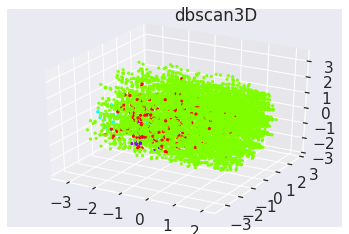

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.text2D(0.5, 0.95, 'dbscan3D', transform=ax.transAxes)
ax.scatter(new_X[:,0], new_X[:,1], new_X[:,2], c = Y, alpha = 0.9, s = 5)
plt.savefig(Filepath+str(my_minpts)+"_"+str(my_eps)+"_"+"DBSCAN3D_out.png")
plt.show()


Testing with sklearn

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler

In [ ]:
reduced_rate =0.5
from sklearn.decomposition.incremental_pca import IncrementalPCA
ncomponents = int(X_train.shape[1] * reduced_rate)
pca = IncrementalPCA(n_components = ncomponents)
X_train = pca.fit_transform(X_train) 

In [ ]:
db = DBSCAN(eps=my_eps, min_samples=my_minpts).fit(X_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#print(labels)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 241


[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]


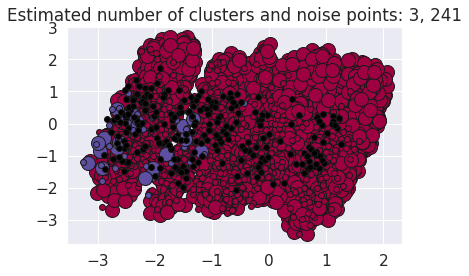

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
#print(unique_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 10, len(unique_labels))]
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_train[class_member_mask & core_samples_mask]
    #print(xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters and noise points: %d, %d' % (n_clusters_ ,n_noise_))
plt.savefig(Filepath+str(my_minpts)+"_"+str(my_eps)+"_"+"DBSCAN2D_out.png")
plt.show()

Optics

In [ ]:
 import json
 import numpy as np
 def load_feature_vectors():
        data = []
        lengths = []
        
        with open(Filepath+"miner.tmp.non_redundant_rules", 'r') as feature_reader:
            print('Loading number of LHS and RHS features...')
            lhs_count = int(feature_reader.readline())
            rhs_count = int(feature_reader.readline())
            print('Loading feature vectors... ')
            for line in feature_reader:
                rule_text, f_vector = json.loads(line.strip())
                rule = string_2_rule(rule_text.strip())
                lengths.append(rule.length())
                #print(rule) this rule as an object of the assocition rule class
                data.append(f_vector)
                
                
        return np.array(data), lengths, lhs_count, rhs_count

In [ ]:
X_train, lengths, lhs_feature_count, rhs_feature_count = load_feature_vectors() #step 1

Loading number of LHS and RHS features...
Loading feature vectors... 


In [ ]:
lhs_feature_count,rhs_feature_count

(77, 2)

Loading Association Rules

In [ ]:
def load_association_rules():
        association_rules_list = []
        with open(Filepath+"miner.tmp.non_redundant_rules", 'r') as rules_reader:
            rules_reader.readline()
            rules_reader.readline()
            
            for line in rules_reader:
                rule_text, _ = json.loads(line.strip())
                association_rules_list.append(AssociationRule.string_2_rule(rule_text.strip()))
        print(association_rules_list)
        return association_rules_list

In [ ]:
association_rules_list = load_association_rules() #step 2

[<__main__.AssociationRule object at 0x7f4ce9d08790>, <__main__.AssociationRule object at 0x7f4ce9d08dd0>, <__main__.AssociationRule object at 0x7f4ce9d08c90>, <__main__.AssociationRule object at 0x7f4cef0fd310>, <__main__.AssociationRule object at 0x7f4cef0fd4d0>, <__main__.AssociationRule object at 0x7f4ce15e2790>, <__main__.AssociationRule object at 0x7f4ce9b7b450>, <__main__.AssociationRule object at 0x7f4ce1674e90>, <__main__.AssociationRule object at 0x7f4cdf3f3a50>, <__main__.AssociationRule object at 0x7f4ce3729d10>, <__main__.AssociationRule object at 0x7f4ce9bdb850>, <__main__.AssociationRule object at 0x7f4ce9bdb1d0>, <__main__.AssociationRule object at 0x7f4ce9bdb2d0>, <__main__.AssociationRule object at 0x7f4ce9bdb210>, <__main__.AssociationRule object at 0x7f4ce9bdb690>, <__main__.AssociationRule object at 0x7f4ce9bdb090>, <__main__.AssociationRule object at 0x7f4ce9bdb8d0>, <__main__.AssociationRule object at 0x7f4ce9bdb790>, <__main__.AssociationRule object at 0x7f4ce9b

In [ ]:
freq_itemset_dict = load_frequent_itemsets_as_dict()

In [ ]:
from sklearn.decomposition.incremental_pca import IncrementalPCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [ ]:
def run_dbscan(dbscan_params, nthreads, data, points,xi):
        print ('Doing clustering ....')
        print('epsilon ' + str(epsilon))
        reduced_rate =0.5
        
        ncomponents = int(data.shape[1] * reduced_rate)
        pca = IncrementalPCA(n_components = ncomponents)
        data = pca.fit_transform(data) 
        
        
        db  = OPTICS(min_samples=points,xi=xi).fit(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        
        labels = db.labels_
        
        #Y = noconflict_db.Y.copy()

        Y = labels
        
        n_clusters = len(set(Y))- (1 if -1 in Y else 0)
        n_noises = list(Y).count(-1)
        
       
        print('Number of clusters' + str(n_clusters))
        print('Number of noises' + str(n_noises))
    
        print("Y" , Y)
        print("Type of Y is ",type(Y))
        print("Lenght of Y is",len(Y))
        return Y

In [ ]:
def merge_itemsets(itemset_1, itemset_2):
    merged_items = []
    merged_items.extend(itemset_1)
    merged_items.extend(itemset_2)
    merged_items = list(set(merged_items))
    merged_items = sorted(merged_items)
    
    return merged_items

In [ ]:
from collections import Counter

In [ ]:
cluster_labels = run_dbscan(dbscan_params, nthreads = 4, data=X_train, points=my_minpoints, xi=xi)

Doing clustering ....
epsilon 0.005
Number of clusters11
Number of noises6902
Y [-1  8 -1 ... -1 -1 -1]
Type of Y is  <class 'numpy.ndarray'>
Lenght of Y is 7042


Computing confidence

In [ ]:
rules_and_their_clusters = []

In [ ]:
confidence_support_values = compute_confidence(association_rules_list)

rule_confidence_dict {'A10@2>class@2': (0.9024390243902439, 74), 'A10@?>class@2': (1.0, 4), 'A11@2>class@2': (0.9436619718309859, 67), 'A11@?>class@2': (1.0, 4), 'A12@2>class@2': (0.898876404494382, 80), 'A12@?>class@2': (1.0, 4), 'A13@1>class@1': (0.8571428571428571, 6), 'A13@2>class@2': (0.9021739130434783, 83), 'A13@?>class@2': (1.0, 4), 'A14@1>class@2': (0.9672131147540983, 59), 'A1@22>class@2': (1.0, 2), 'A1@23>class@2': (1.0, 3), 'A1@24>class@2': (1.0, 2), 'A1@25>class@2': (1.0, 2), 'A1@27>class@2': (1.0, 2), 'A1@28>class@2': (1.0, 4), 'A1@30>class@2': (1.0, 5), 'A1@32>class@2': (1.0, 3), 'A1@34>class@2': (1.0, 6), 'A1@36>class@2': (1.0, 6), 'A1@37>class@2': (1.0, 3), 'A1@38>class@2': (0.8333333333333334, 5), 'A1@39>class@2': (1.0, 4), 'A1@50>class@2': (0.8333333333333334, 5), 'A1@51>class@2': (1.0, 3), 'A1@52>class@2': (1.0, 2), 'A1@54>class@2': (1.0, 4), 'A2@1>class@2': (0.8404255319148937, 79), 'A2@2>class@2': (1.0, 9), 'A3@1>class@2': (0.8085106382978723, 38), 'A3@2>class@2':

Saving to file

In [ ]:
print('Saving clusters to the output file ....')
for i in range(len(cluster_labels)):
  rule_key = association_rules_list[i].serialize()
  rules_and_their_clusters.append((rule_key, cluster_labels[i], 
                                         confidence_support_values[rule_key]))

Saving clusters to the output file ....


In [ ]:
rules_and_their_clusters = sorted(rules_and_their_clusters, key=lambda x: x[1])

In [ ]:
with open(Filepath+'rules_with_clusters_Optics.txt', 'w') as f:
  f.write("\n".join(str(v) for v in rules_and_their_clusters))

Finding Unexpected rules

In [ ]:
print('Finding unexpected patterns ....')

Finding unexpected patterns ....


In [ ]:
unexpected_rules = clustering_engine.detect_unexpectedness(cluster_labels)

Geting conflict information...
7042 12
Finding unexpectedness....
Number of unexpected patterns 1044


In [ ]:
with open(Filepath+'unexpected_rules_optics.txt', 'w') as f:
  f.write("\n".join(str(v) for v in unexpected_rules))

In [ ]:
IOHelper.save_as_json_format(Filepath+'unexpected_rule_file_json_optics', unexpected_rules)

Plotting in 3D

In [ ]:
import colorsys

def get_N_HexCol(N=5):

    HSV_tuples = [(x * 1.0 / N, 1, 1) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    #print(hex_out)
    return hex_out

In [ ]:
def load_feature_vectors(input_file):
    features = []
    association_rules = []
    
    with open(input_file, 'r') as feature_reader:
        feature_reader.readline()
        feature_reader.readline()
        for line in feature_reader:
            rule_text, f_vector = json.loads(line.strip())
            association_rules.append(rule_text)
            features.append(f_vector)
    return np.array(features), association_rules

In [ ]:
X, association_rules = load_feature_vectors(Filepath+"miner.tmp.non_redundant_rules")

In [ ]:
m = 2
print('dimensional reduce: ' + str(m))
    
pca = IncrementalPCA(n_components = X.shape[1]//m)
new_X = pca.fit_transform(X)
clusters, number_of_clusters = load_clusters(Filepath+"rules_with_clusters_Optics.txt")
print (number_of_clusters)
    
unique_colors = get_N_HexCol(number_of_clusters + 1)
Y = []
for rule in association_rules:
  cluster_id = clusters[rule]
  Y.append(unique_colors[cluster_id + 1])

dimensional reduce: 2
11


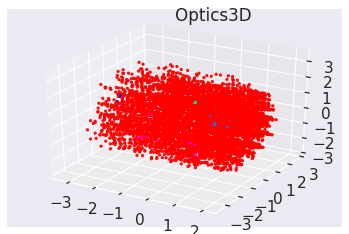

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.text2D(0.5, 0.95, 'Optics3D', transform=ax.transAxes)
ax.scatter(new_X[:,0], new_X[:,1], new_X[:,2], c = Y, alpha = 0.9, s = 5)
plt.savefig(Filepath+str(my_minpoints)+"_"+str(xi)+"_"+"Optics3D_out.png")
plt.show()


Evalution

In [ ]:
score_list = dict()

In [ ]:
#Loading test and train dataset

In [ ]:
from sklearn.metrics.ranking import roc_curve, auc
from sklearn.metrics.classification import f1_score
from sklearn.svm.classes import SVC
from sklearn.ensemble.forest import RandomForestClassifier

In [ ]:
train_data_set.load(inputfilepath, 0, has_header = False)

loading done


In [ ]:
X_train, Y_train = train_data_set.convert_2_binary_format()

convert_2_binary_format attr_dict {'A1@30': True, 'A6@2': True, 'A4@2': True, 'A11@2': True, 'A7@2': True, 'A8@2': True, 'A9@2': True, 'A10@2': True, 'A14@1': True, 'A5@2': True, 'A12@2': True, 'A3@1': True, 'A2@1': True, 'A13@2': True, 'A1@34': True, 'A9@1': True, 'A2@2': True, 'A4@1': True, 'A14@2': True, 'A1@38': True, 'A8@1': True, 'A1@54': True, 'A10@1': True, 'A7@1': True, 'A3@2': True, 'A6@1': True, 'A1@23': True, 'A5@1': True, 'A1@27': True, 'A11@1': True, 'A1@36': True, 'A13@1': True, 'A1@47': True, 'A1@52': True, 'A1@24': True, 'A1@49': True, 'A1@42': True, 'A1@58': True, 'A1@40': True, 'A1@31': True, 'A1@50': True, 'A1@45': True, 'A1@61': True, 'A1@33': True, 'A1@44': True, 'A1@37': True, 'A1@39': True, 'A1@65': True, 'A12@1': True, 'A1@41': True, 'A8@?': True, 'A1@35': True, 'A9@?': True, 'A1@25': True, 'A1@32': True, 'A1@78': True, 'A1@51': True, 'A1@56': True, 'A1@57': True, 'A1@46': True, 'A1@22': True, 'A1@20': True, 'A13@?': True, 'A6@?': True, 'A7@?': True, 'A11@?': T

In [ ]:
Y_train.item_dict

{'class@1': 0, 'class@2': 1}

In [ ]:
test_data_set = DataSet()
test_data_set.load(inputTestfilepath, 0, has_header = False)
Xtest, Ytest = test_data_set.convert_2_binary_format_with(X_train.item_dict, Y_train.item_dict)
Ytest = Ytest.flatten()

loading done
not in features...
not in features...
not in features...
not in features...
not in features...
not in features...
not in features...
not in features...
not in features...


In [ ]:
class_count = train_data_set.number_of_classes()

In [ ]:
class_count

2

DBSCAN

In [ ]:
unexpected_rules = IOHelper.load_json_object(Filepath+"unexpected_rule_file_json_DBSCAN")

In [ ]:
def filter_association_rules(unexpected_rules, delta_1 = 0):
    rules = []
    for x in unexpected_rules:
        if x[2][0][1] > delta_1: 
            rules.append(AssociationRule.string_2_rule(x[0]))
    return rules

In [ ]:
refined_unexpected_rules = filter_association_rules(unexpected_rules)

In [ ]:
print('svm testing...')
svc_model = SVC()
svc_model.fit(X_train.relation_matrix, Y_train.values.flatten())

svm testing...


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def refine_with_unexpectedness(data_set, classes_dict, preY, Ytrue, unexpected_rules, model, clus):
    
    print('Refine with unexpected rules...')
    y_pred = np.copy(preY)
    for i in range(data_set.size()):
        x = data_set.get_transaction(i)
        print("x is ",x)
        for r in unexpected_rules:
            #print(r)
            if r.satisfy_rule(x, is_lhs = True):
                print("r.satisfy_rule(x, is_lhs = True)", r.satisfy_rule(x, is_lhs = True))
                label = r.right_items[0]
                print("label is ",label)
                y_pred[i] = classes_dict[label]
                print("y pred for i is",y_pred[i])
    x_axis_labels = ['No', 'Yes']
    y_axis_labels = ['No', 'Yes']
    print(f1_score(Ytrue, y_pred, average=None))
    my_score = f1_score(Ytrue, y_pred, average=None)
    print(confusion_matrix(Ytrue, y_pred))
    c=confusion_matrix(Ytrue, y_pred)
    df_cm = pd.DataFrame(c, range(2), range(2))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels=x_axis_labels, yticklabels=y_axis_labels) # font size

    
    if (data_set.number_of_classes() <= 2):
        fpr, tpr, _ = roc_curve(Ytrue, y_pred.flatten())
        print(auc(fpr, tpr))
        my_auc = auc(fpr, tpr)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")  
    plt.savefig(Filepath+"Refined_"+model+"_"+"DBSCAN"+"_"+"confusion_matrix.png")
    plt.show()

    return my_score, my_auc

In [ ]:
svc_y_pred = svc_model.predict(Xtest)
print(f1_score(Ytest, svc_y_pred, average=None))
if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, svc_y_pred.flatten())    
  print(auc(fpr, tpr))

score_list['SVM basic score'] = f1_score(Ytest, svc_y_pred, average=None)
score_list['SVM basic auc score'] = auc(fpr, tpr)



[0.27272727 0.80487805]
0.5596638655462185


Refine with unexpected rules...
x is  ['A1@30', 'A14@2', 'A4@2', 'A9@1', 'A7@1', 'A3@2', 'A6@1', 'A8@2', 'A10@2', 'A11@1', 'A13@1', 'A5@1', 'A12@1', 'A2@1']
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
x is  ['A10@1', 'A4@2', 'A1@45', 'A11@2', 'A7@2', 'A6@1', 'A2@2', 'A8@2', 'A9@2', 'A14@1', 'A5@1', 'A12

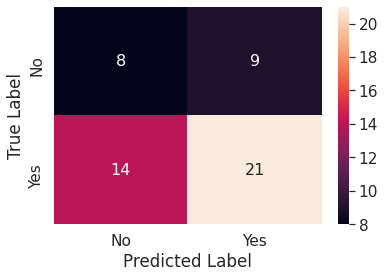

In [ ]:
my_score , my_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, svc_y_pred, Ytest, refined_unexpected_rules, "SVM", "DBSCAN")

In [ ]:
score_list['SVM refined score DBSCAN'] = my_score
score_list['SVM refined score auc DBSCAN'] = my_auc

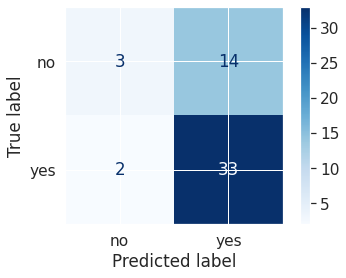

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(svc_model, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"SVM"+"_"+"DBSCAN"+"_"+"confusion_matrix.png")
plt.show()

Random Forest

In [ ]:
print('Random forest testing...')
rf_model = RandomForestClassifier(n_estimators=20, random_state=1)
rf_model.fit(X_train.relation_matrix, Y_train.values.flatten())
    
rf_y_pred = rf_model.predict(Xtest)
print(f1_score(Ytest, rf_y_pred, average=None))
if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, rf_y_pred.flatten())
  print(auc(fpr, tpr))
    
score_list['RF basic'] =f1_score(Ytest, rf_y_pred, average=None)

score_list['RF basic auc score'] = auc(fpr, tpr)

Random forest testing...
[0.44444444 0.80519481]
0.619327731092437


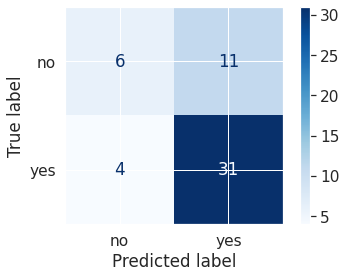

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(rf_model, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"RF"+"_"+"DBSCAN"+"_"+"confusion_matrix.png")
plt.show()

Refine with unexpected rules...
x is  ['A1@30', 'A14@2', 'A4@2', 'A9@1', 'A7@1', 'A3@2', 'A6@1', 'A8@2', 'A10@2', 'A11@1', 'A13@1', 'A5@1', 'A12@1', 'A2@1']
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
x is  ['A10@1', 'A4@2', 'A1@45', 'A11@2', 'A7@2', 'A6@1', 'A2@2', 'A8@2', 'A9@2', 'A14@1', 'A5@1', 'A12

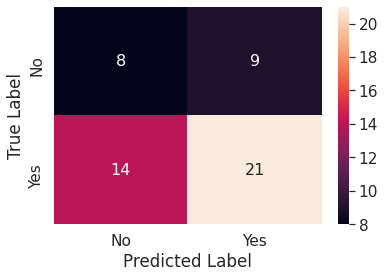

In [ ]:
my_score , my_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, rf_y_pred, Ytest, refined_unexpected_rules, "RF", "DBSCAN")

In [ ]:
score_list['RF refined DBSCAN'] = my_score

score_list['RF refined score auc DBSCAN'] = my_auc

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train.relation_matrix, Y_train.values.flatten())
    
mlp_y_pred = clf_mlp.predict(Xtest)
print(f1_score(Ytest, mlp_y_pred, average=None))


if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, mlp_y_pred.flatten())
  print(auc(fpr, tpr))


score_list['MLP basic'] =f1_score(Ytest, rf_y_pred, average=None)
score_list['MLP basic auc score'] = auc(fpr, tpr)

[0.        0.8045977]
0.5


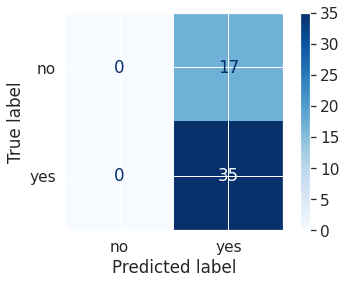

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(clf_mlp, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"MLP"+"_"+"DBSCAN"+"_"+"confusion_matrix.png")
plt.show()

Refine with unexpected rules...
x is  ['A1@30', 'A14@2', 'A4@2', 'A9@1', 'A7@1', 'A3@2', 'A6@1', 'A8@2', 'A10@2', 'A11@1', 'A13@1', 'A5@1', 'A12@1', 'A2@1']
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
r.satisfy_rule(x, is_lhs = True) True
label is  class@1
y pred for i is 0
x is  ['A10@1', 'A4@2', 'A1@45', 'A11@2', 'A7@2', 'A6@1', 'A2@2', 'A8@2', 'A9@2', 'A14@1', 'A5@1', 'A12

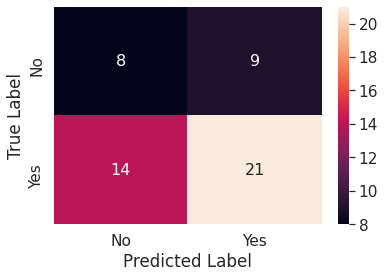

In [ ]:
my_score , my_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, mlp_y_pred, Ytest, refined_unexpected_rules, "MLP", "DBSCAN")

In [ ]:
score_list['MLP refined DBSCAN'] = my_score

score_list['MLP refined score auc DBSCAN'] = my_auc

Optics

In [ ]:
unexpected_rules = IOHelper.load_json_object(Filepath+"unexpected_rule_file_json_optics")

In [ ]:
refined_unexpected_rules = filter_association_rules(unexpected_rules)

In [ ]:
print('svm testing...')
svc_model = SVC()
svc_model.fit(X_train.relation_matrix, Y_train.values.flatten())

svm testing...


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def refine_with_unexpectedness(data_set, classes_dict, preY, Ytrue, unexpected_rules, model, clus):
    
    print('Refine with unexpected rules...')
    y_pred = np.copy(preY)
    for i in range(data_set.size()):
        x = data_set.get_transaction(i)
        print("x is ",x)
        for r in unexpected_rules:
            #print(r)
            if r.satisfy_rule(x, is_lhs = True):
                print("r.satisfy_rule(x, is_lhs = True)", r.satisfy_rule(x, is_lhs = True))
                label = r.right_items[0]
                print("label is ",label)
                y_pred[i] = classes_dict[label]
                print("y pred for i is",y_pred[i])
    x_axis_labels = ['No', 'Yes']
    y_axis_labels = ['No', 'Yes']
    print(f1_score(Ytrue, y_pred, average=None))
    my_score = f1_score(Ytrue, y_pred, average=None)
    print(confusion_matrix(Ytrue, y_pred))
    c=confusion_matrix(Ytrue, y_pred)
    df_cm = pd.DataFrame(c, range(2), range(2))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels=x_axis_labels, yticklabels=y_axis_labels) # font size

    
    if (data_set.number_of_classes() <= 2):
        fpr, tpr, _ = roc_curve(Ytrue, y_pred.flatten())
        print(auc(fpr, tpr))
        my_auc = auc(fpr, tpr)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")  
    plt.savefig(Filepath+"Refined_"+model+"_"+"Optics"+"_"+"confusion_matrix.png")
    plt.show()

    return my_score, my_auc

In [ ]:
svc_y_pred = svc_model.predict(Xtest)
print(f1_score(Ytest, svc_y_pred, average=None))
if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, svc_y_pred.flatten())    
  print(auc(fpr, tpr))

[0.27272727 0.80487805]
0.5596638655462185


Streaming output truncated to the last 5000 lines.
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label

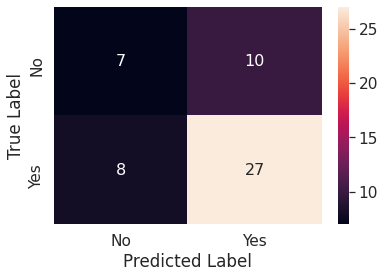

In [ ]:
my_score , mu_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, svc_y_pred, Ytest, refined_unexpected_rules, "SVM", "Optics")

In [ ]:
score_list['SVM refined Optics'] = my_score

score_list['SVM refined score auc Optics'] = my_auc

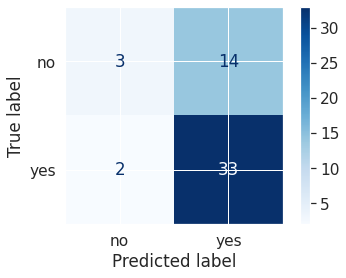

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(svc_model, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"SVM"+"_"+"Optics"+"_"+"confusion_matrix.png")
plt.show()

Random Forest

In [ ]:
print('Random forest testing...')
rf_model = RandomForestClassifier(n_estimators=20, random_state=1)
rf_model.fit(X_train.relation_matrix, Y_train.values.flatten())
    
rf_y_pred = rf_model.predict(Xtest)
print(f1_score(Ytest, rf_y_pred, average=None))
if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, rf_y_pred.flatten())
  print(auc(fpr, tpr))
    


Random forest testing...
[0.44444444 0.80519481]
0.619327731092437


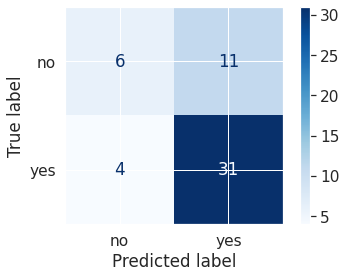

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(rf_model, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"RF"+"_"+"Optics"+"_"+"confusion_matrix.png")
plt.show()

Streaming output truncated to the last 5000 lines.
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label

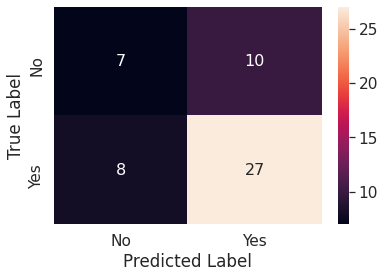

In [ ]:
my_score , my_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, rf_y_pred, Ytest, refined_unexpected_rules, "RF", "Optics")

In [ ]:
score_list['RF refined Optics'] = my_score

score_list['RF refined score auc Optics'] = my_auc

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train.relation_matrix, Y_train.values.flatten())
    
mlp_y_pred = clf_mlp.predict(Xtest)
print(f1_score(Ytest, mlp_y_pred, average=None))
if (class_count <= 2):
  fpr, tpr, _ = roc_curve(Ytest, mlp_y_pred.flatten())
  print(auc(fpr, tpr))

[0.        0.8045977]
0.5


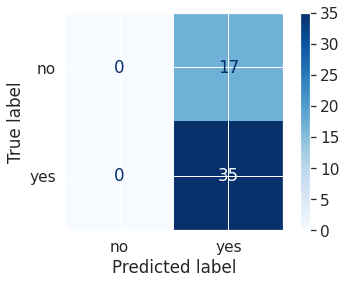

In [ ]:
class_names = ['no', 'yes']
# Plot non-normalized confusion matrix
plot_confusion_matrix(clf_mlp, Xtest, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
plt.savefig(Filepath+"MLP"+"_"+"Optics"+"_"+"confusion_matrix.png")
plt.show()

Streaming output truncated to the last 5000 lines.
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label is  class@2
y pred for i is 1
r.satisfy_rule(x, is_lhs = True) True
label

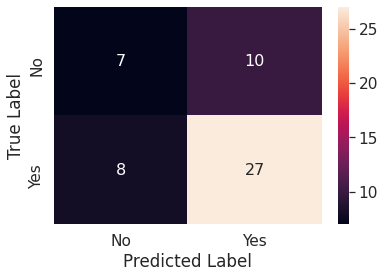

In [ ]:
my_score,my_auc = refine_with_unexpectedness(test_data_set, Y_train.item_dict, mlp_y_pred, Ytest, refined_unexpected_rules, "MLP", "Optics")

In [ ]:
score_list['MLP refined Optics'] = my_score

score_list['MLP refined score auc Optics'] = my_auc

In [ ]:
score_list

{'MLP basic': array([0.44444444, 0.80519481]),
 'MLP basic auc score': 0.5,
 'MLP refined DBSCAN': array([0.41025641, 0.64615385]),
 'MLP refined Optics': array([0.4375, 0.75  ]),
 'MLP refined score auc DBSCAN': 0.5352941176470588,
 'MLP refined score auc Optics': 0.5915966386554622,
 'RF basic': array([0.44444444, 0.80519481]),
 'RF basic auc score': 0.619327731092437,
 'RF refined DBSCAN': array([0.41025641, 0.64615385]),
 'RF refined Optics': array([0.4375, 0.75  ]),
 'RF refined score auc DBSCAN': 0.5352941176470588,
 'RF refined score auc Optics': 0.5915966386554622,
 'SVM basic auc score': 0.5596638655462185,
 'SVM basic score': array([0.27272727, 0.80487805]),
 'SVM refined Optics': array([0.4375, 0.75  ]),
 'SVM refined score DBSCAN': array([0.41025641, 0.64615385]),
 'SVM refined score auc DBSCAN': 0.5352941176470588,
 'SVM refined score auc Optics': 0.5352941176470588}

Test data ratio

In [ ]:
unique, counts = np.unique(Y_train.values, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 15]
 [ 1 88]]


In [ ]:
Ytest

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
unique, counts = np.unique(Ytest, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 17]
 [ 1 35]]
